The Cab ride data covers various types of cabs for Uber & Lyft and their price for the given location. You can also find if there was any surge in the price during that time.
Weather data contains weather attributes like temperature, rain, cloud, etc for all the locations taken into consideration. Aim of this assignment is answer the following questions and see which independent variable can used to predict the target variable(i.e. price)


1)What are the data types? (Only numeric and categorical)

2)Are there missing values?

3)What are the likely distributions of the numeric variables?

4)Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

5)Which independent variables have missing data? How much?

6)Do the training and test sets have the same data?

7)In the predictor variables independent of all the other 
predictor variables?

8)Which predictor variables are the most important?

9)Do the ranges of the predictor variables make sense?

10)What are the distributions of the predictor variables?

11)Remove outliers and keep outliers (does if have an effect of the final predictive model)?

12)Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. 
How well did the methods recover the missing values? 

That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [1]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [5]:
df = pd.read_csv("/content/drive/MyDrive/uber lyft csv.csv")
df.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

        datetime          timezone            source    destination cab_type  \
0  12/16/18 9:30  America/New_York  Haymarket Square  North Station     Lyft   
1  11/27/18 2:00  America/New_York  Haymarket Square  North Station     Lyft   
2  11/28/18 1:00  America/New_York  Haymarket Square  North Station     Lyft   
3  11/30/18 4:53  America/New_York  Haymarket Square  North Station     Lyft   
4  11/29/18 3:49  America/New_York  Haymarket Square  North Station     Lyft   

     product_id          name  price  distance  surge_multiplier  latitude  \
0     lyft_line        Shared    5.0      0.44               1.0   42.2148   
1  lyft_premier           Lux   11.0      0.44               1.0   42.2148   
2          lyft          Lyft    7.0      0.44               1.0   42.2148   
3   lyft_luxsuv  Lux Black XL   26.0      0.44               1.0   42.2148   
4     lyft_plus       Lyft XL    9.0      0.44               1.0   42.2148   

   longitude  temperature  apparentTemperature    short_summary  \
0    -71.033        42.34                37.12   Mostly Cloudy    
1    -71.033        43.58                37.35            Rain    
2    -71.033        38.33                32.93           Clear    
3    -71.033        34.38                29.63           Clear    
4    -71.033        37.44                30.88   Partly Cloudy    

                                        long_summary  precipIntensity  \
0                          Rain throughout the day.            0.0000   
1   Rain until morning, starting again in the eve...           0.1299   
2                        Light rain in the morning.            0.0000   
3                 Partly cloudy throughout the day.            0.0000   
4                 Mostly cloudy throughout the day.            0.0000   

   precipProbability  humidity  windSpeed  windGust  windGustTime  visibility  \
0                0.0      0.68       8.66      9.17    1545015600      10.000   
1                1.0      0.94      11.98     11.98    1543291200       4.786   
2                0.0      0.75       7.33      7.33    1543334400      10.000   
3                0.0      0.73       5.28      5.28    1543514400      10.000   
4                0.0      0.70       9.14      9.14    1543446000      10.000   

   temperatureHigh  temperatureHighTime  temperatureLow  temperatureLowTime  \
0            43.68           1544968800           34.19          1545048000   
1            47.30           1543251600           42.10          1543298400   
2            47.55           1543320000           33.10          1543402800   
3            45.03           1543510800           28.90          1543579200   
4            42.18           1543420800           36.71          1543478400   

   apparentTemperatureHigh  apparentTemperatureHighTime  \
0                    37.95                   1544968800   
1                    43.92                   1543251600   
2                    44.12                   1543320000   
3                    38.53                   1543510800   
4                    35.75                   1543420800   

   apparentTemperatureLow  apparentTemperatureLowTime                   icon  \
0                   27.39                  1545044400   partly-cloudy-night    
1                   36.20                  1543291200                  rain    
2                   29.11                  1543392000           clear-night    
3                   26.20                  1543575600           clear-night    
4                   30.29                  1543460400   partly-cloudy-night  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           65535 non-null  object 
 1   timestamp                    65535 non-null  float64
 2   hour                         65535 non-null  int64  
 3   day                          65535 non-null  int64  
 4   month                        65535 non-null  int64  
 5   datetime                     65535 non-null  object 
 6   timezone                     65535 non-null  object 
 7   source                       65535 non-null  object 
 8   destination                  65535 non-null  object 
 9   cab_type                     65535 non-null  object 
 10  product_id                   65535 non-null  object 
 11  name                         65535 non-null  object 
 12  price                        60392 non-null  float64
 13  distance        

In [7]:
df.drop(['id','timestamp','datetime','windGustTime','temperatureHighTime','temperatureLowTime','apparentTemperatureHighTime','apparentTemperatureLowTime','Unnamed: 55','Unnamed: 56','apparentTemperatureMinTime','temperatureMaxTime','temperatureMinTime','uvIndexTime','sunriseTime','sunsetTime'], axis= 1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hour                     65535 non-null  int64  
 1   day                      65535 non-null  int64  
 2   month                    65535 non-null  int64  
 3   timezone                 65535 non-null  object 
 4   source                   65535 non-null  object 
 5   destination              65535 non-null  object 
 6   cab_type                 65535 non-null  object 
 7   product_id               65535 non-null  object 
 8   name                     65535 non-null  object 
 9   price                    60392 non-null  float64
 10  distance                 65535 non-null  float64
 11  surge_multiplier         65535 non-null  float64
 12  latitude                 65535 non-null  float64
 13  longitude                65535 non-null  float64
 14  temperature           

In [9]:
df.describe()

hour           day        month         price      distance  \
count  65535.000000  65535.000000  65535.00000  60392.000000  65535.000000   
mean      11.557382     17.999023     11.57438     16.558311      2.186257   
std        6.985797      9.984434      0.49444      9.334517      1.137093   
min        0.000000      1.000000     11.00000      2.500000      0.020000   
25%        5.000000     13.000000     11.00000      9.000000      1.270000   
50%       12.000000     17.000000     12.00000     13.500000      2.150000   
75%       18.000000     28.000000     12.00000     22.500000      2.930000   
max       23.000000     30.000000     12.00000     92.000000      7.460000   

       surge_multiplier      latitude     longitude   temperature  \
count      65535.000000  65535.000000  65535.000000  65535.000000   
mean           1.014946     42.338298    -71.066196     39.560918   
std            0.093710      0.047669      0.020256      6.699983   
min            1.000000     42.214800    -71.105400     18.910000   
25%            1.000000     42.350300    -71.081000     36.500000   
50%            1.000000     42.351900    -71.063100     40.490000   
75%            1.000000     42.364700    -71.054200     43.580000   
max            2.500000     42.366100    -71.033000     57.220000   

       apparentTemperature  precipIntensity  precipProbability      humidity  \
count         65535.000000     65535.000000       65535.000000  65535.000000   
mean             35.839931         0.008861           0.143880      0.740672   
std               7.863145         0.026895           0.327076      0.138125   
min              12.130000         0.000000           0.000000      0.380000   
25%              31.910000         0.000000           0.000000      0.640000   
50%              35.900000         0.000000           0.000000      0.710000   
75%              40.010000         0.000000           0.000000      0.880000   
max              57.220000         0.144700           1.000000      0.960000   

          windSpeed      windGust    visibility  temperatureHigh  \
count  65535.000000  65535.000000  65535.000000     65535.000000   
mean       6.200324      8.480034      8.482864        45.009603   
std        3.137633      5.245634      2.590060         5.952099   
min        0.450000      0.800000      0.717000        32.680000   
25%        3.410000      4.060000      8.459000        42.570000   
50%        5.920000      7.560000      9.883000        44.660000   
75%        8.410000     11.820000      9.996000        46.910000   
max       15.000000     27.250000     10.000000        57.870000   

       temperatureLow  apparentTemperatureHigh  apparentTemperatureLow  \
count    65535.000000             65535.000000            65535.000000   
mean        34.194155                41.547556               30.170019   
std          6.363145                 7.608940                7.968308   
min         17.850000                22.620000               11.810000   
25%         30.170000                36.570000               27.700000   
50%         34.190000                40.950000               30.030000   
75%         38.730000                44.060000               35.320000   
max         46.600000                57.200000               47.250000   

           dewPoint      pressure   windBearing    cloudCover       uvIndex  \
count  65535.000000  65535.000000  65535.000000  65535.000000  65535.000000   
mean      31.621386   1009.906186    220.728496      0.686715      0.242603   
std        9.108709     13.488282     98.777700      0.358740      0.469308   
min        4.390000    988.090000      2.000000      0.000000      0.000000   
25%       27.490000    999.800000    124.000000      0.370000      0.000000   
50%       30.320000   1008.970000    259.000000      0.820000      0.000000   
75%       38.120000   1021.710000    303.000000      1.000000      0.000000   
max       50.670000   1035.550000    356.000000      1.00

1) What are the data types? (Only numeric and categorical)

In [10]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [11]:
numeric_data.shape[1]

32

In [95]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hour                     65535 non-null  int64  
 1   day                      65535 non-null  int64  
 2   month                    65535 non-null  int64  
 3   distance                 65535 non-null  float64
 4   surge_multiplier         65535 non-null  float64
 5   latitude                 65535 non-null  float64
 6   longitude                65535 non-null  float64
 7   temperature              65535 non-null  float64
 8   apparentTemperature      65535 non-null  float64
 9   precipIntensity          65535 non-null  float64
 10  precipProbability        65535 non-null  float64
 11  humidity                 65535 non-null  float64
 12  windSpeed                65535 non-null  float64
 13  windGust                 65535 non-null  float64
 14  visibility            

In [12]:
categorical_data.shape[1]

9

In [96]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   timezone       65535 non-null  object
 1   source         65535 non-null  object
 2   destination    65535 non-null  object
 3   cab_type       65535 non-null  object
 4   product_id     65535 non-null  object
 5   name           65535 non-null  object
 6   short_summary  65535 non-null  object
 7   long_summary   65535 non-null  object
 8   icon           65535 non-null  object
dtypes: object(9)
memory usage: 4.5+ MB


Q2)Are there missing values?

There are missing values in the target variable, which has 7.8% missing data in it

In [13]:
df.isna().sum()

hour                          0
day                           0
month                         0
timezone                      0
source                        0
destination                   0
cab_type                      0
product_id                    0
name                          0
price                      5143
distance                      0
surge_multiplier              0
latitude                      0
longitude                     0
temperature                   0
apparentTemperature           0
short_summary                 0
long_summary                  0
precipIntensity               0
precipProbability             0
humidity                      0
windSpeed                     0
windGust                      0
visibility                    0
temperatureHigh               0
temperatureLow                0
apparentTemperatureHigh       0
apparentTemperatureLow        0
icon                          0
dewPoint                      0
pressure                      0
windBear

Q5) Which independent variables have missing data? How much?

apart from the target variable, there is no missing data in this dataset

In [14]:
missing_list = df.columns[df.isna().any()].tolist() 
missing_count = []      
for i in missing_list:
  missing_count.append(sum(pd.isnull(df[str(i)])))

d = {'Missing_Column':missing_list,'Missing_Values':missing_count}
Missing_DF = pd.DataFrame(d)
Missing_DF["%_Missing"] = (Missing_DF['Missing_Values'] / df.shape[0]) * 100
Missing_DF

Missing_Column  Missing_Values  %_Missing
0          price            5143   7.847715

3)What are the likely distributions of the numeric variables?

Distribution of Numeric and Categorical Variables

In [15]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hour                     65535 non-null  int64  
 1   day                      65535 non-null  int64  
 2   month                    65535 non-null  int64  
 3   price                    60392 non-null  float64
 4   distance                 65535 non-null  float64
 5   surge_multiplier         65535 non-null  float64
 6   latitude                 65535 non-null  float64
 7   longitude                65535 non-null  float64
 8   temperature              65535 non-null  float64
 9   apparentTemperature      65535 non-null  float64
 10  precipIntensity          65535 non-null  float64
 11  precipProbability        65535 non-null  float64
 12  humidity                 65535 non-null  float64
 13  windSpeed                65535 non-null  float64
 14  windGust              

3.1)Firstly I created a dataframe which contained only the numerical variables and then using qqplot, plotted to check the distributions of these variables

A Q-Q plot (Quantile-Quantile plot) is used to compare the distribution of two datasets. Some of the common distributions that can be represented in a Q-Q plot are:

Normal distribution: If the points in the Q-Q plot follow a straight line, it indicates that the data follows a normal distribution.

Log-normal distribution: If the points in the Q-Q plot follow an S-shaped curve, it indicates that the data follows a log-normal distribution.

Exponential distribution: If the points in the Q-Q plot follow a downward sloping line, it indicates that the data follows an exponential distribution.

Weibull distribution: If the points in the Q-Q plot follow an upward sloping line, it indicates that the data follows a Weibull distribution.

Pareto distribution: If the points in the Q-Q plot follow a curved line, it indicates that the data follows a Pareto distribution.

Lognormal distribution: If the points in the Q-Q plot follow a U-shaped curve, it indicates that the data follows a lognormal distribution.

<Figure size 576x360 with 0 Axes>

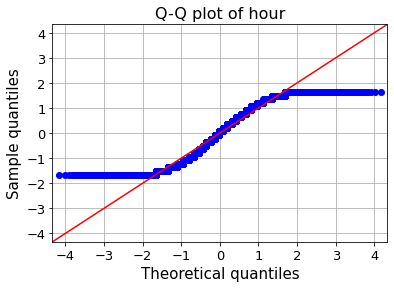

<Figure size 576x360 with 0 Axes>

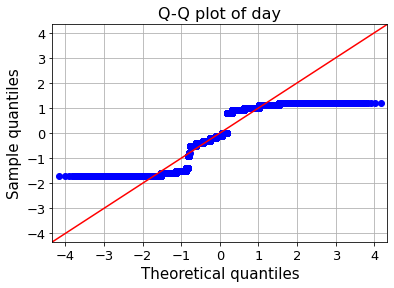

<Figure size 576x360 with 0 Axes>

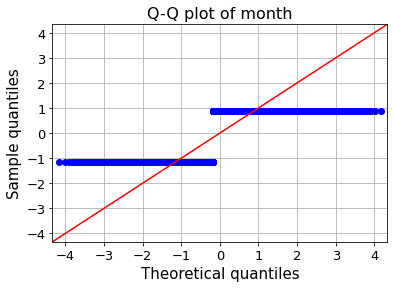

<Figure size 576x360 with 0 Axes>

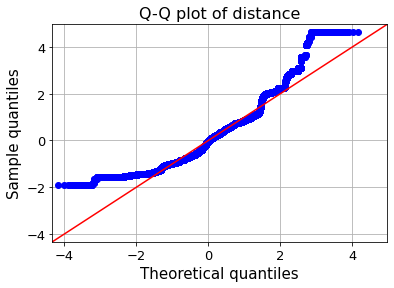

<Figure size 576x360 with 0 Axes>

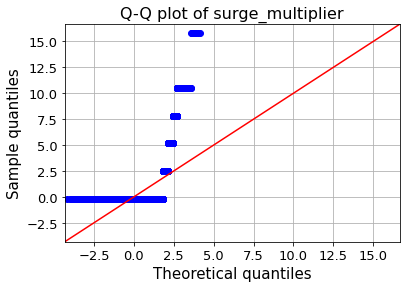

<Figure size 576x360 with 0 Axes>

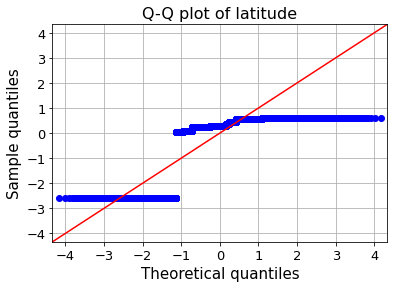

<Figure size 576x360 with 0 Axes>

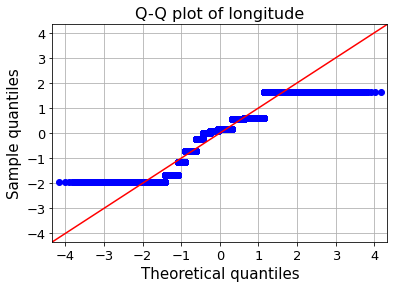

<Figure size 576x360 with 0 Axes>

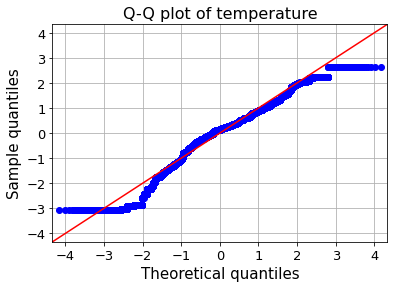

<Figure size 576x360 with 0 Axes>

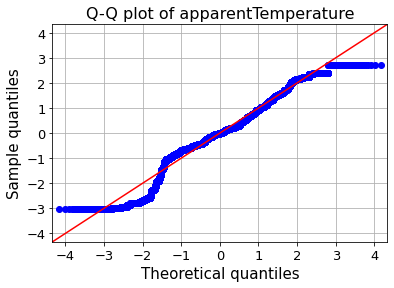

<Figure size 576x360 with 0 Axes>

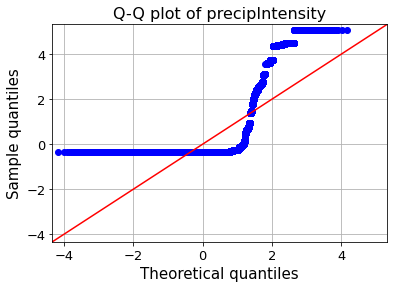

<Figure size 576x360 with 0 Axes>

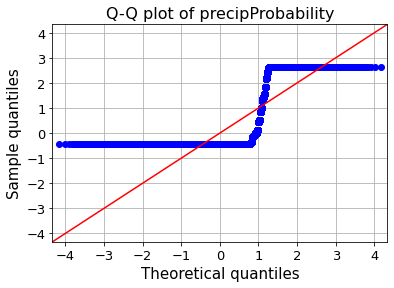

<Figure size 576x360 with 0 Axes>

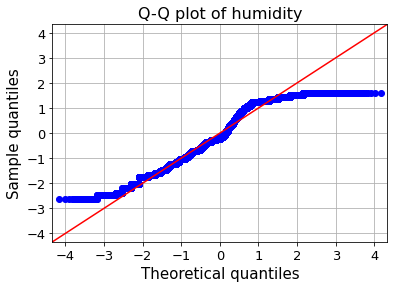

<Figure size 576x360 with 0 Axes>

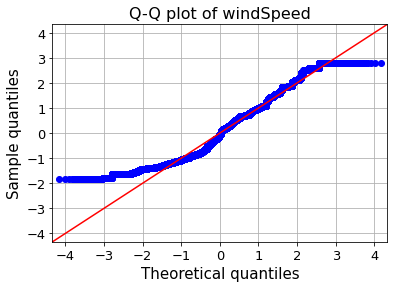

<Figure size 576x360 with 0 Axes>

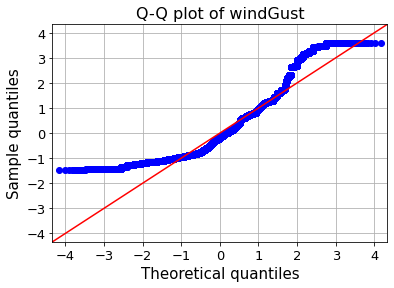

<Figure size 576x360 with 0 Axes>

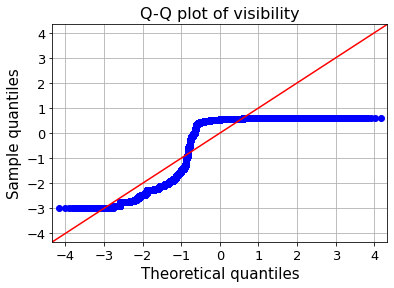

<Figure size 576x360 with 0 Axes>

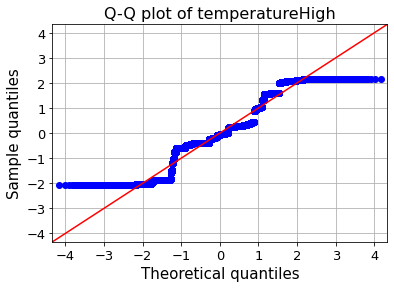

<Figure size 576x360 with 0 Axes>

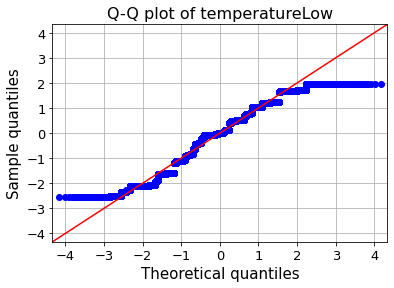

<Figure size 576x360 with 0 Axes>

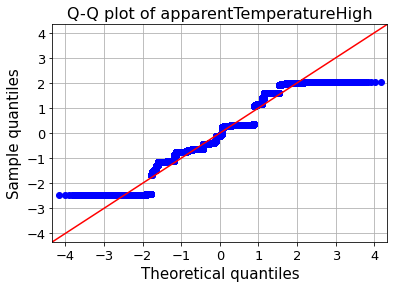

<Figure size 576x360 with 0 Axes>

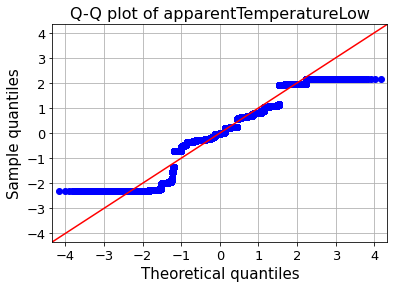

<Figure size 576x360 with 0 Axes>

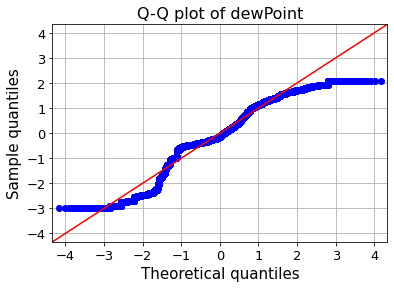

<Figure size 576x360 with 0 Axes>

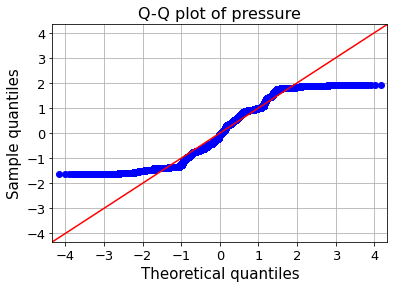

<Figure size 576x360 with 0 Axes>

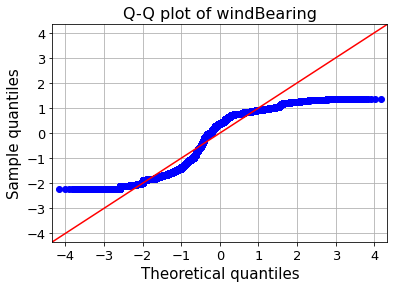

<Figure size 576x360 with 0 Axes>

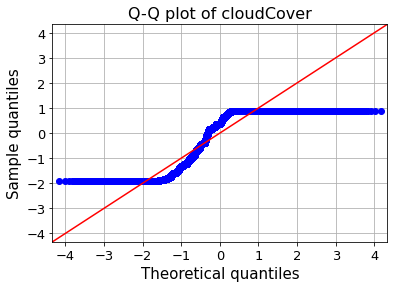

<Figure size 576x360 with 0 Axes>

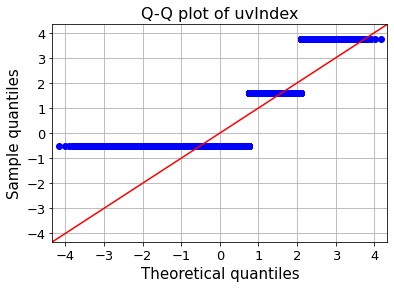

<Figure size 576x360 with 0 Axes>

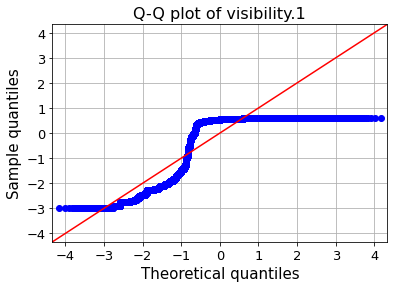

<Figure size 576x360 with 0 Axes>

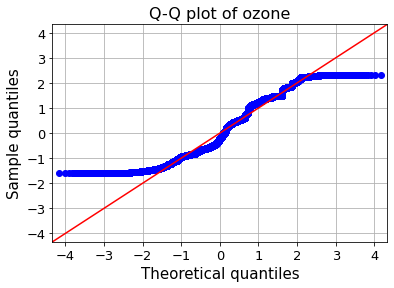

<Figure size 576x360 with 0 Axes>

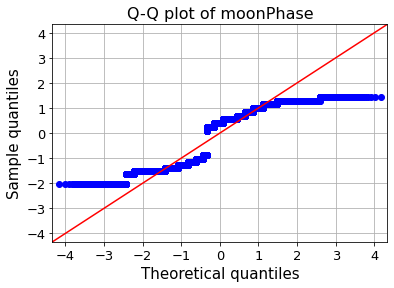

<Figure size 576x360 with 0 Axes>

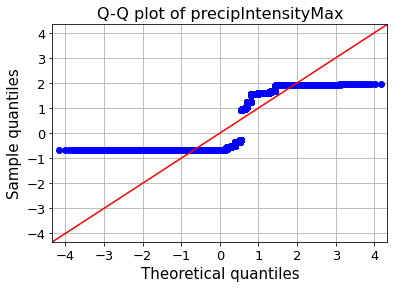

<Figure size 576x360 with 0 Axes>

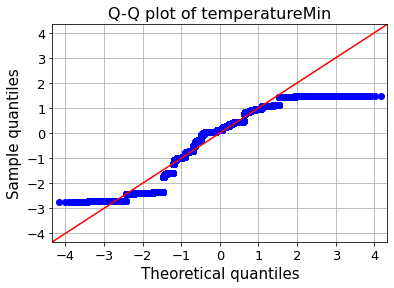

<Figure size 576x360 with 0 Axes>

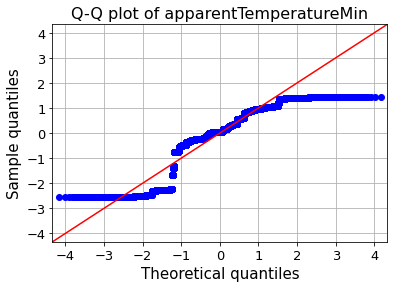

In [16]:
from statsmodels.graphics.gofplots import qqplot
data_col = numeric_data[['hour','day','month','distance','surge_multiplier','latitude','longitude','temperature','apparentTemperature','precipIntensity','precipProbability',
                         'humidity','windSpeed','windGust','visibility','temperatureHigh','temperatureLow','apparentTemperatureHigh','apparentTemperatureLow','dewPoint','pressure','windBearing','cloudCover','uvIndex'
                         ,'visibility.1','ozone','moonPhase','precipIntensityMax','temperatureMin','apparentTemperatureMin']]
for c in data_col.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_col[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

3.2) Using plotly Express, created a function to plot histograms for categorical and numerical variables

In [17]:
import plotly.express as px
def plot_bar(groupby_column):
    df1 = df.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame=df1, x=groupby_column, y="counts", color=groupby_column, barmode="group")
    print(df1)
    fig1.show(renderer='png')

    hour  counts
0      0    3152
1      1    2736
2      2    2811
3      3    2622
4      4    2783
5      5    2391
6      6    2589
7      7    2338
8      8    2304
9      9    2833
10    10    2805
11    11    2830
12    12    2849
13    13    2772
14    14    2781
15    15    2840
16    16    2870
17    17    2797
18    18    2751
19    19    2582
20    20    2639
21    21    2642
22    22    2786
23    23    3032


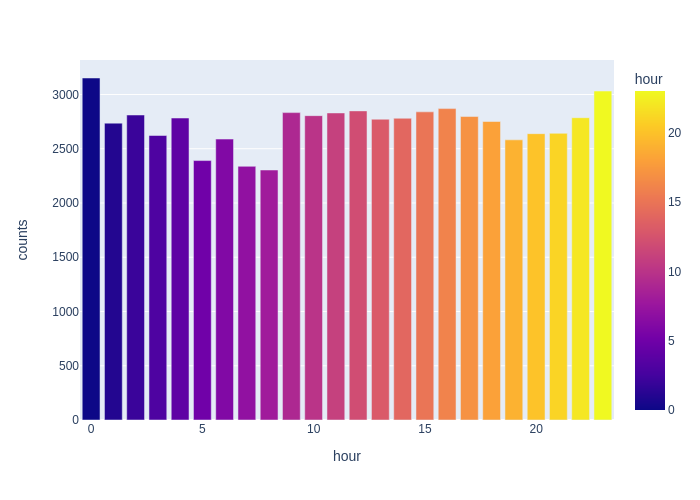

In [18]:
plot_bar('hour')

    day  counts
0     1    4153
1     2    4116
2     3    4205
3     4    1171
4     9     185
5    10     318
6    13    3680
7    14    4160
8    15    4130
9    16    4160
10   17    4095
11   18    3269
12   26    3152
13   27    7161
14   28    7338
15   29    6033
16   30    4209


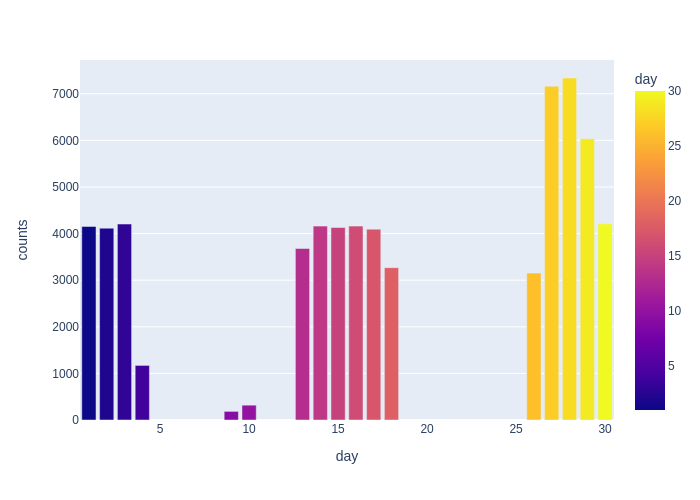

In [19]:
plot_bar('day')

   month  counts
0     11   27893
1     12   37642


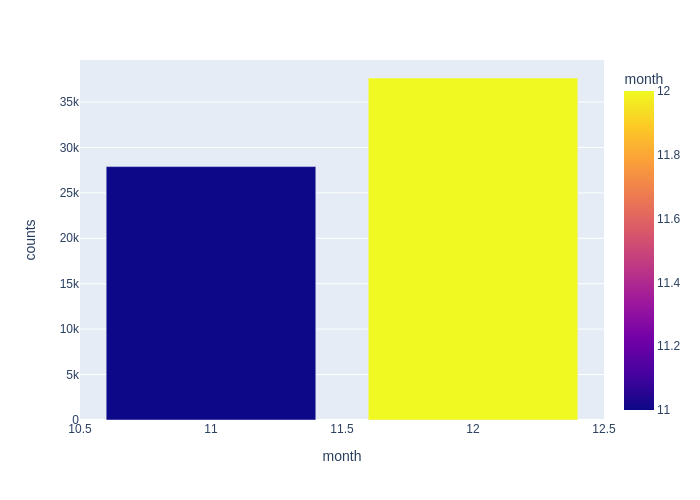

In [20]:
plot_bar('month')

                     source  counts
0                  Back Bay    5394
1               Beacon Hill    5614
2         Boston University    5267
3                    Fenway    5245
4        Financial District    5522
5          Haymarket Square    5673
6                 North End    5372
7             North Station    5399
8   Northeastern University    5474
9             South Station    5274
10         Theatre District    5707
11                 West End    5594


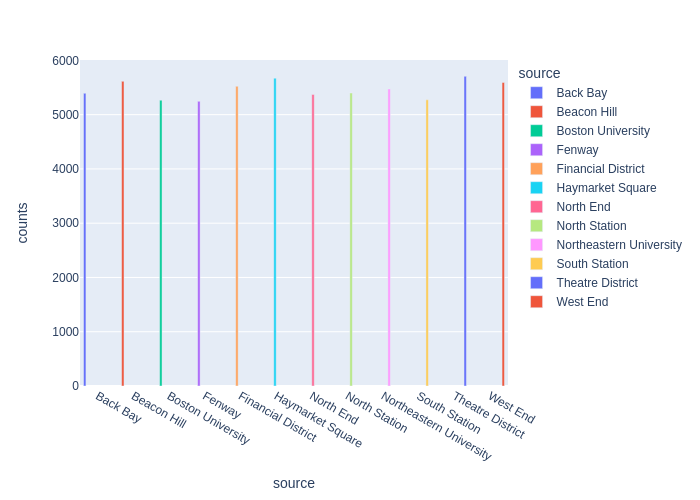

In [21]:
plot_bar('source')

                destination  counts
0                  Back Bay    5325
1               Beacon Hill    5556
2         Boston University    5591
3                    Fenway    5625
4        Financial District    5413
5          Haymarket Square    5625
6                 North End    5696
7             North Station    5402
8   Northeastern University    5770
9             South Station    4923
10         Theatre District    5560
11                 West End    5049


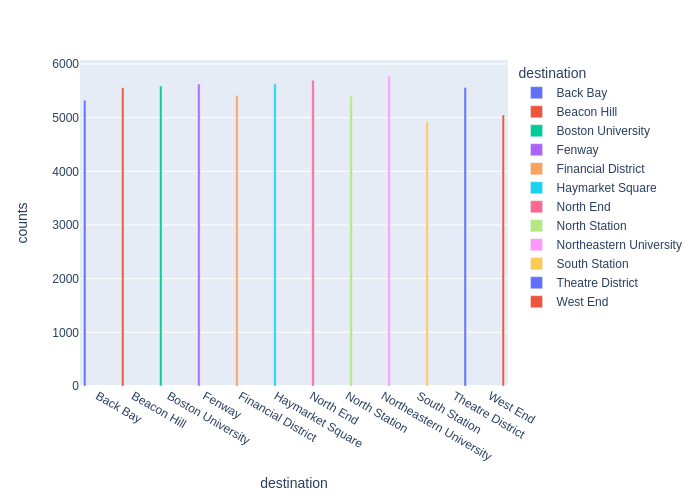

In [22]:
plot_bar('destination')

In [23]:
df.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})

latitude  longitude
destination             source                                       
Back Bay                Boston University        42.335964 -71.065841
                        Fenway                   42.338570 -71.066748
                        Haymarket Square         42.336100 -71.064796
                        North End                42.337239 -71.065941
                        Northeastern University  42.337492 -71.064768
                        South Station            42.338672 -71.066703
Beacon Hill             Boston University        42.338343 -71.066932
                        Fenway                   42.341220 -71.066067
                        Haymarket Square         42.337991 -71.065094
                        North End                42.337555 -71.065736
                        Northeastern University  42.338358 -71.066610
                        South Station            42.337006 -71.065269
Boston University       Back Bay                 42.338365 -71.066527
                        Beacon Hill              42.338113 -71.066716
                        Financial District       42.340418 -71.067593
                        North Station            42.337212 -71.066721
                        Theatre District         42.337771 -71.066537
                        West End                 42.338268 -71.066062
Fenway                  Back Bay                 42.341339 -71.066442
                        Beacon Hill              42.339731 -71.065978
                        Financial District       42.337053 -71.065993
                        North Station            42.338604 -71.065758
                        Theatre District         42.336399 -71.066748
                        West End                 42.336597 -71.065394
Financial District      Boston University        42.342747 -71.067438
                        Fenway                   42.338044 -71.067093
                        Haymarket Square         42.337672 -71.066505
                        North End                42.340223 -71.067019
                        Northeastern University  42.339775 -71.066551
                        South Station            42.336974 -71.066509
Haymarket Square        Back Bay                 42.336993 -71.065414
                        Beacon Hill              42.339801 -71.066949
                        Financial District       42.336600 -71.065254
                        North Station            42.338891 -71.066437
                        Theatre District         42.338896 -71.066804
                        West End                 42.339383 -71.066774
North End               Back Bay                 42.338673 -71.065704
                        Beacon Hill              42.340334 -71.066113
                        Financial District       42.336309 -71.065728
                        North Station            42.339396 -71.066394
                        Theatre District         42.336775 -71.065531
                        West End                 42.337681 -71.065175
North Station           Boston University        42.339777 -71.065964
                        Fenway                   42.337470 -71.066457
                        Haymarket Square         42.333892 -71.065887
                        North End                42.336381 -71.066089
                        Northeastern University  42.338904 -71.067147
                        South Station            42.337900 -71.067045
Northeastern University Back Bay                 42.339557 -71.066345
                        Beacon Hill              42.335626 -71.065210
                        Financial District       42.339727 -71.067000
                        North Station            42.336881 -71.065242
                        Theatre District         42.343132 -71.066654
                        West End                 42.338050 -71.067121
South Station           Back Bay                 42.337523 -71.066328
                        Beacon Hill              42.338593 -

3.3) Using the geopandas library and latitude and longitude, plotted the number of taxis taken from Haymarket Square 

In [97]:
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster
df1 = df[df['source']=='Haymarket Square']
my_map = folium.Map(location=[df1["latitude"].mean(), df1["longitude"].mean()],zoom_start = 10)
my_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist(),color='green'))
my_map

3.4) Count for type of cab used in November and December

  cab_type  counts
0     Lyft   29565
1     Uber   35970


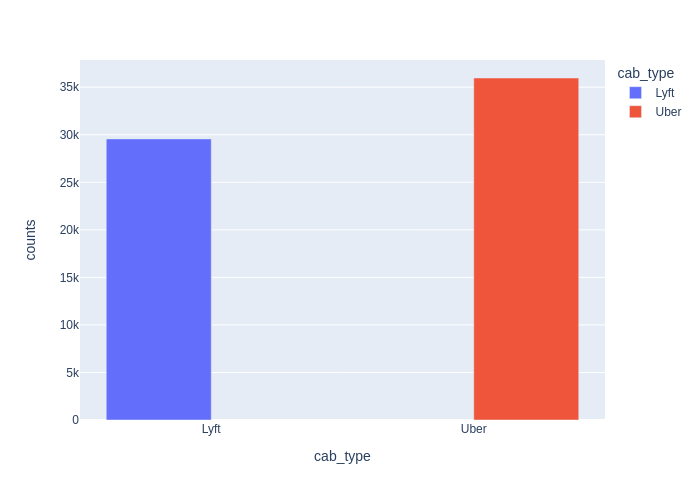

In [25]:
plot_bar('cab_type')

3.5) Type of cab used on each day

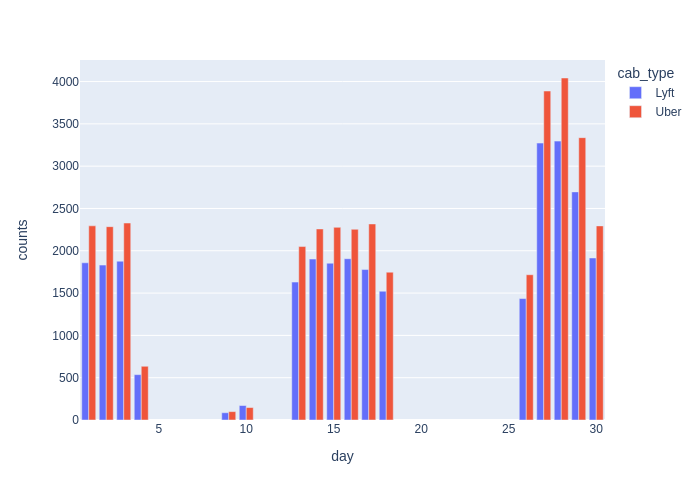

In [98]:
df2 =df.groupby(by=["day","cab_type"]).size().reset_index(name="counts")
fig2 = px.bar(data_frame=df2, x="day", y="counts", color="cab_type", barmode="group")
fig2.show(renderer='png')

3.6) Mean of price for source and destination

In [27]:
pd.set_option('display.max_rows', 72)
df.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        13.822637
                        Fenway                   13.908273
                        Haymarket Square         17.851369
                        North End                19.529063
                        Northeastern University  12.996714
                        South Station            17.422659
Beacon Hill             Boston University        16.575460
                        Fenway                   16.321893
                        Haymarket Square         13.904736
                        North End                15.366071
                        Northeastern University  16.461061
                        South Station            16.129435
Boston University       Back Bay                 14.047715
                        Beacon Hill              17.375494
                        Financial District       24.247909
                        North Station            20.343902
                        Theatre District         18.888024
                        West End                 18.683197
Fenway                  Back Bay                 13.777143
                        Beacon Hill              16.988429
                        Financial District       23.284447
                        North Station            19.714539
                        Theatre District         18.124553
                        West End                 17.996537
Financial District      Boston University        25.227273
                        Fenway                   23.706120
                        Haymarket Square         13.304864
                        North End                13.101764
                        Northeastern University  21.593645
                        South Station            12.424334
Haymarket Square        Back Bay                 17.056689
                        Beacon Hill              13.287350
                        Financial District       12.816558
                        North Station            12.299387
                        Theatre District         13.690476
                        West End                 12.566976
North End               Back Bay                 19.898788
                        Beacon Hill              16.046019
                        Financial District       13.422018
                        North Station            12.845657
                        Theatre District         15.338327
                        West End                 13.607843
North Station           Boston University        19.055556
                        Fenway                   18.529573
                        Haymarket Square         12.762620
                        North End                13.124745
                        Northeastern University  19.283748
                        South Station            15.184942
Northeastern University Back Bay                 13.632335
                        Beacon Hill              16.916472
                        Financial District       22.518707
                        North Station            19.506440
                        Theatre District         16.342018
                        West End                 18.036960
South Station           Back Bay                 19.547134
                        Beacon Hill              17.539851
                        Financial District       12.337870
                        North Station            16.056122
                        Theatre District         14.185680
                        West End                 15.538323
Theatre District        Boston University        20.620023
                        Fenway                   19.065167
                        Haymarket Square         14.984136
                        North End                15.556551
                        Northeastern University  17.030886
                        South Station            12.695093
West End                Boston University 

3.7) 2D Scatter Plot for x = distance and y = price

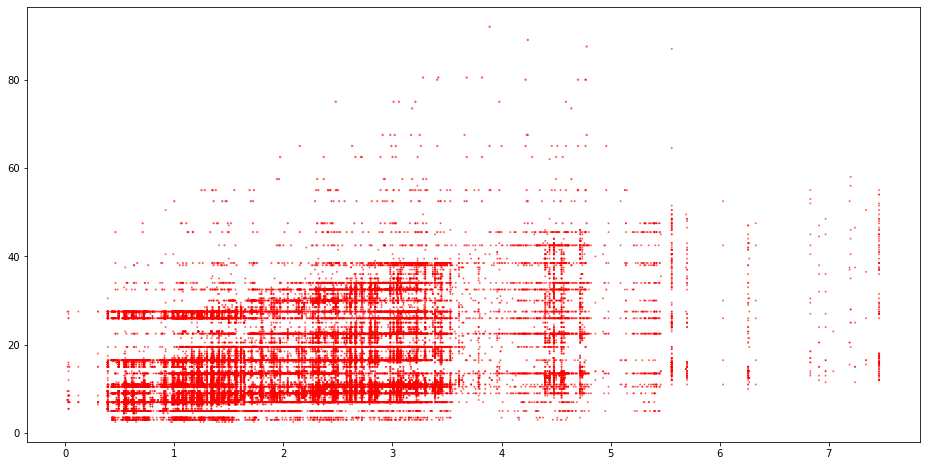

In [28]:
surge_data = df[df["surge_multiplier"]>=1.0]
plt.figure(figsize=(16,8))
plt.scatter(x=surge_data["distance"], y=surge_data["price"], marker='o', c='r',s=surge_data["surge_multiplier"], alpha=0.5)
plt.show()

3.8) 3D Scatter Plot where x = distance , y = price and z = surge_multiplier 

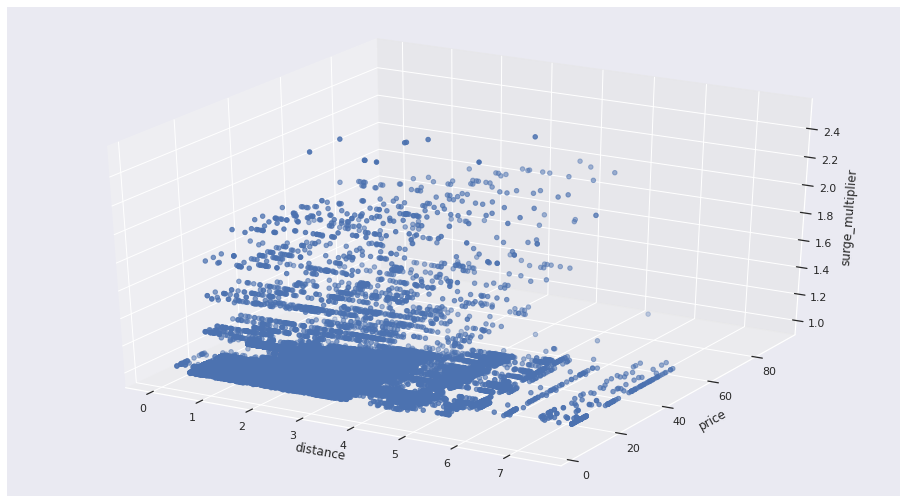

In [29]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection = '3d')

x = surge_data['distance']
y = surge_data['price']
z = surge_data['surge_multiplier']

ax.set_xlabel("distance")
ax.set_ylabel("price")
ax.set_zlabel("surge_multiplier")

ax.scatter(x, y, z)

plt.show()

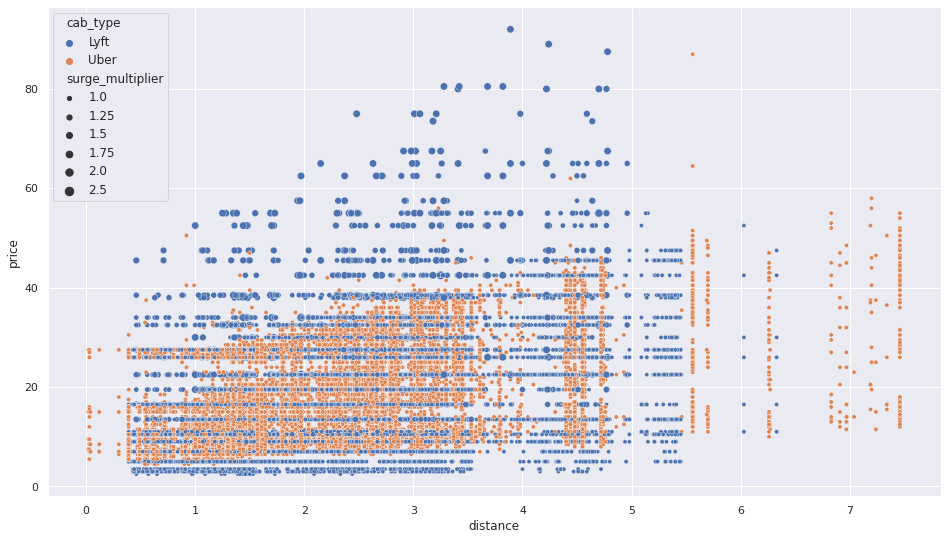

In [30]:
cab_scatter = df[(df["hour"]>=22) | (df["hour"]<=4)]
plt.figure(figsize=(16,9))
sns.scatterplot(data = df, x = "distance",
                y = "price", hue = "cab_type", size = "surge_multiplier")
plt.show()

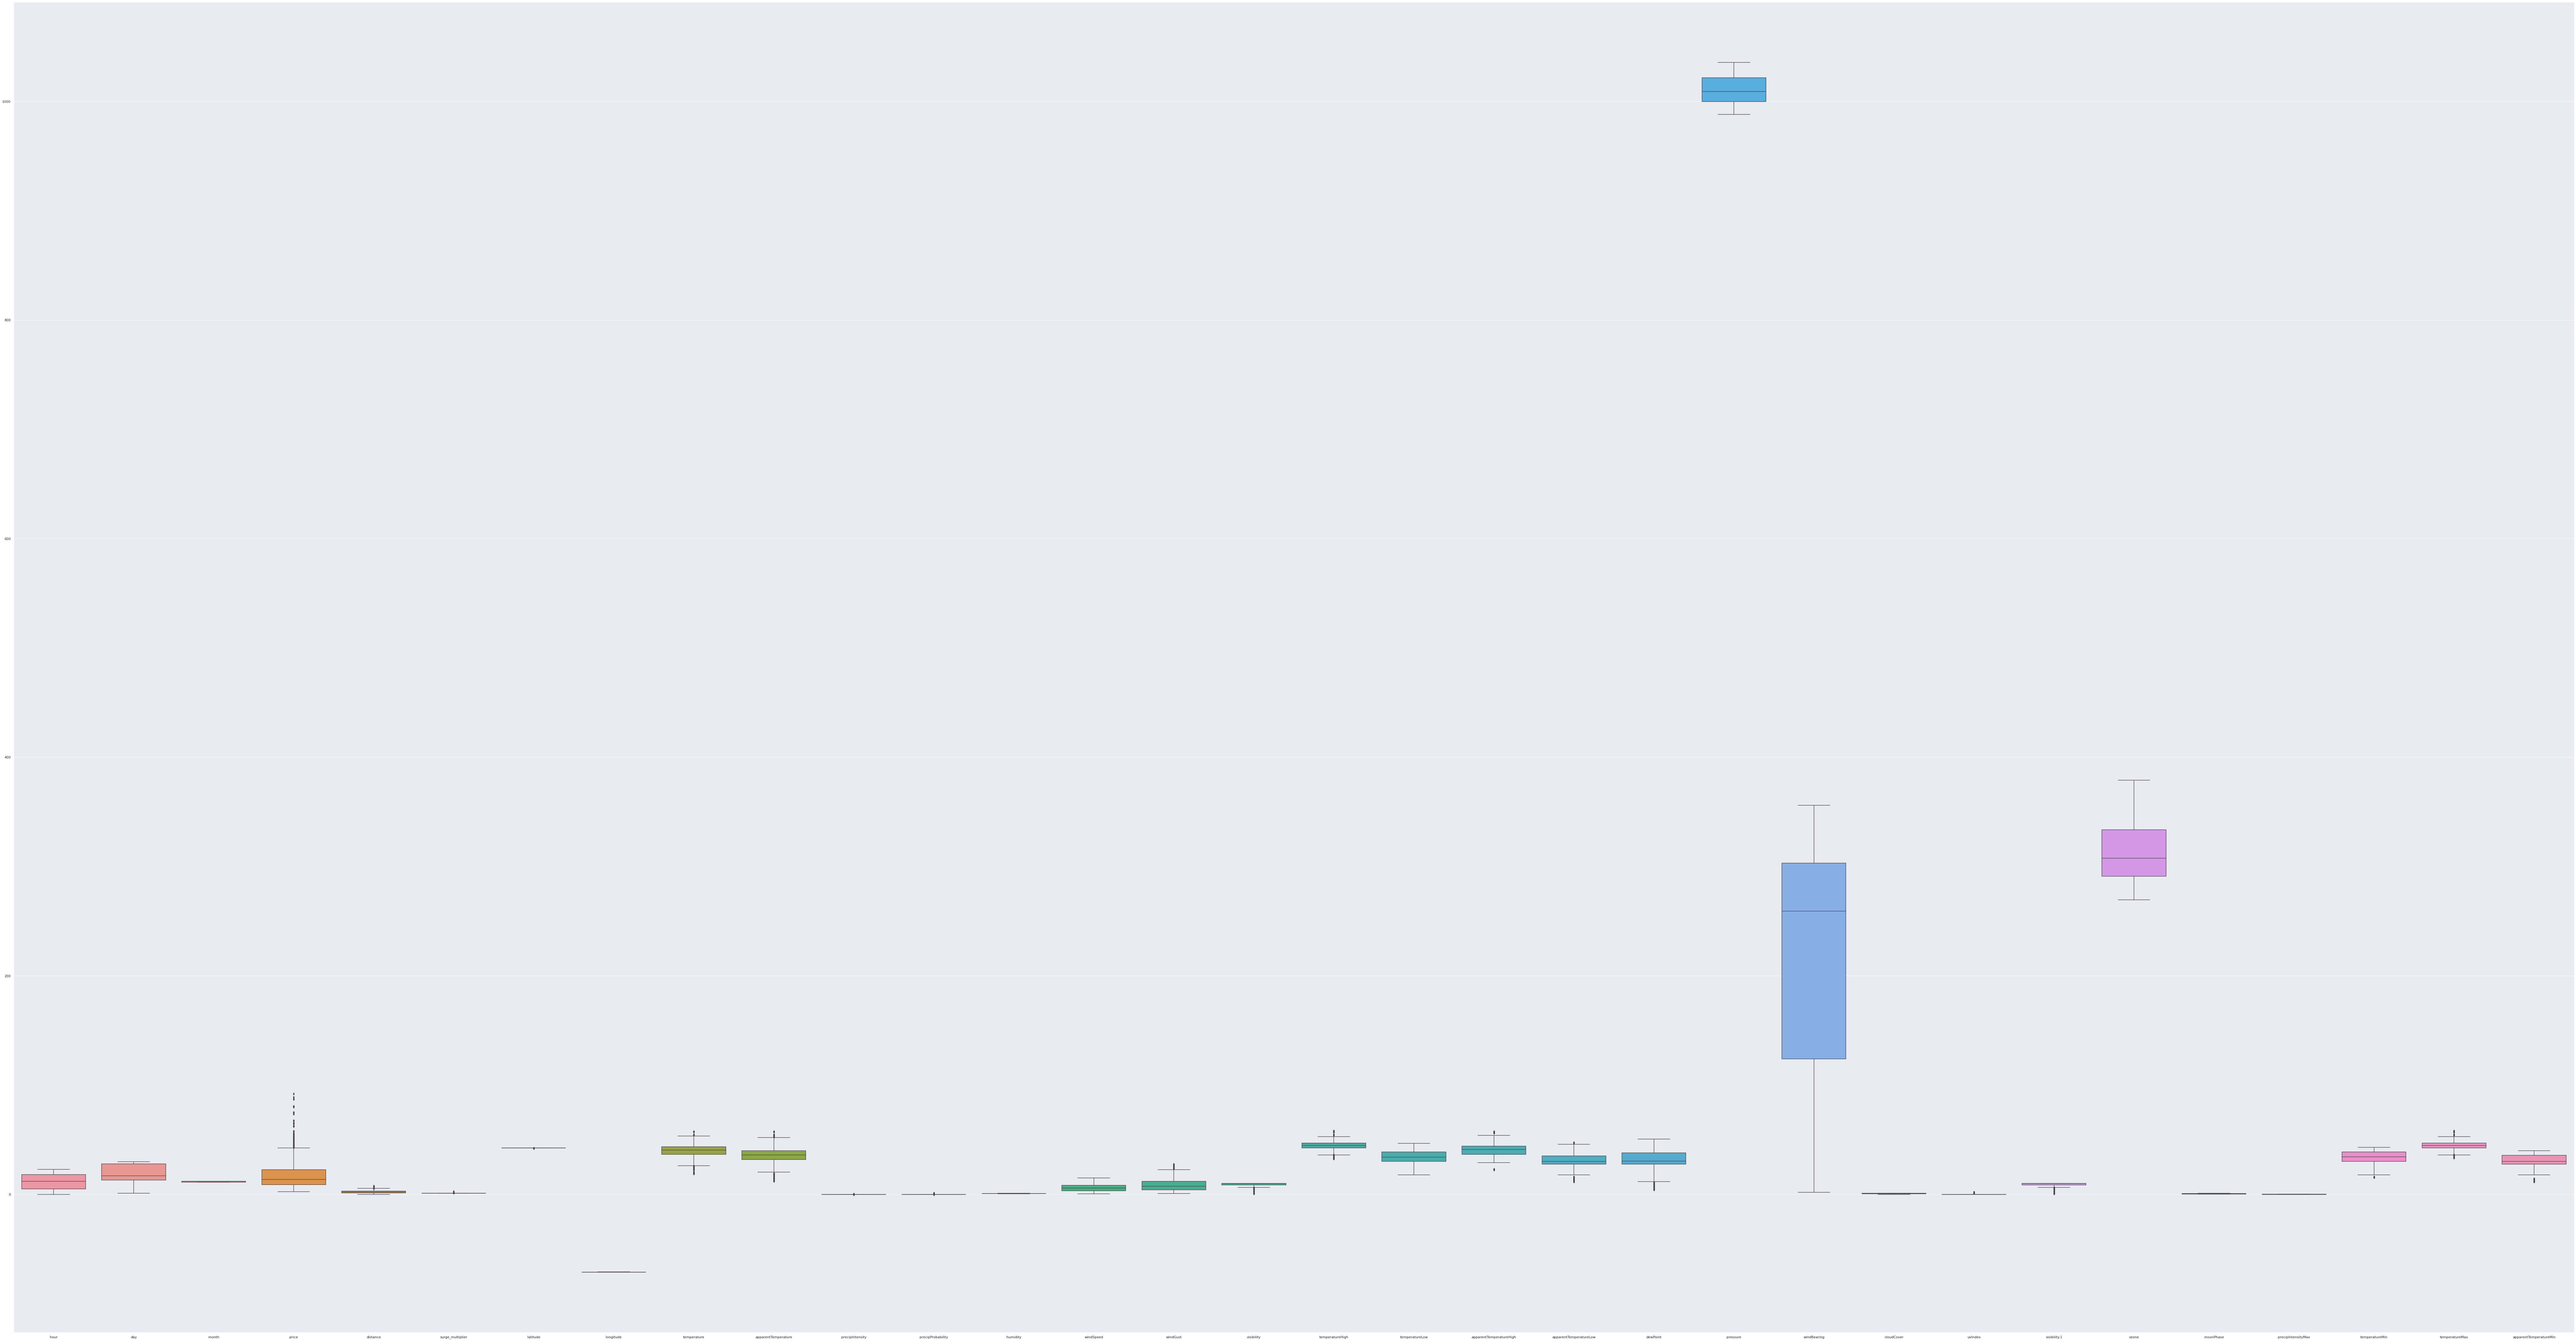

In [31]:
plt.figure(figsize=(150,80))
sns.boxplot(data=numeric_data)

Imputation of Missing values


In [32]:
# Mean Imputation
from sklearn.impute import SimpleImputer
df_mean = numeric_data.copy()
mean_imputer = SimpleImputer(strategy='mean')
df_mean['price'] = mean_imputer.fit_transform(df_mean['price'].values.reshape(-1,1))

In [33]:
numeric_data.head(20)

hour  day  month  price  distance  surge_multiplier  latitude  longitude  \
0      9   16     12    5.0      0.44               1.0   42.2148   -71.0330   
1      2   27     11   11.0      0.44               1.0   42.2148   -71.0330   
2      1   28     11    7.0      0.44               1.0   42.2148   -71.0330   
3      4   30     11   26.0      0.44               1.0   42.2148   -71.0330   
4      3   29     11    9.0      0.44               1.0   42.2148   -71.0330   
5     18   17     12   16.5      0.44               1.0   42.2148   -71.0330   
6      5   26     11   10.5      1.08               1.0   42.3503   -71.0810   
7     19    2     12   16.5      1.08               1.0   42.3503   -71.0810   
8      6    3     12    3.0      1.08               1.0   42.3503   -71.0810   
9     10   27     11   27.5      1.08               1.0   42.3503   -71.0810   
10    16   30     11   13.5      1.08               1.0   42.3503   -71.0810   
11    19   28     11    7.0      1.08               1.0   42.3503   -71.0810   
12    22   30     11   12.0      1.11               1.0   42.3647   -71.0542   
13    10   13     12   16.0      1.11               1.0   42.3647   -71.0542   
14    19   13     12    7.5      1.11               1.0   42.3647   -71.0542   
15    23   16     12    7.5      1.11               1.0   42.3647   -71.0542   
16     0   14     12   26.0      1.11               1.0   42.3647   -71.0542   
17    19   29     11    5.5      1.11               1.0   42.3647   -71.0542   
18    14    1     12    NaN      1.11               1.0   42.3647   -71.0542   
19     6   16     12   11.0      0.72               1.0   42.3661   -71.0631   

    temperature  apparentTemperature  precipIntensity  precipProbability  \
0         42.34                37.12           0.0000               0.00   
1         43.58                37.35           0.1299               1.00   
2         38.33                32.93           0.0000               0.00   
3         34.38                29.63           0.0000               0.00   
4         37.44                30.88           0.0000               0.00   
5         38.75                33.51           0.0000               0.00   
6         41.99                41.99           0.0000               0.00   
7         49.88                49.22           0.0246               1.00   
8         45.58                45.58           0.0000               0.00   
9         45.45                41.77           0.0624               1.00   
10        40.13                38.00           0.0000               0.00   
11        41.47                35.66           0.0000               0.00   
12        40.13                38.08           0.0000               0.00   
13        20.38                20.38           0.0000               0.00   
14        32.85                32.85           0.0000               0.00   
15        41.29                36.01           0.0567               0.94   
16        31.25                31.25           0.0000               0.00   
17        43.49                37.19           0.0000               0.00   
18        36.99                32.27           0.0000               0.00   
19        40.36                35.52           0.0000               0.00   

    humidity  windSpeed  windGust  visibility  temperatureHigh  \
0       0.68       8.66      9.17      10.000            43.68   
1       0.94      11.98     11.98       4.786            47.30   
2       0.75       7.33      7.33      10.000            47.55   
3       0.73       5.28      5.28      10.000            45.03   
4       0.70       9.14      9.14      10.000            42.18   
5       0.84       7.19      8.88       8.325            40.61   
6       0.91       0.53      0.88       4.675            46.46   
7       0.93       3.38      3.38       3.052            50.80   
8       0.96       1.25      2.09       1.413            57.02   
9       0.93       6.87      7.42       2.686            46.91   


In [34]:
df_mean.head(20)

hour  day  month      price  distance  surge_multiplier  latitude  \
0      9   16     12   5.000000      0.44               1.0   42.2148   
1      2   27     11  11.000000      0.44               1.0   42.2148   
2      1   28     11   7.000000      0.44               1.0   42.2148   
3      4   30     11  26.000000      0.44               1.0   42.2148   
4      3   29     11   9.000000      0.44               1.0   42.2148   
5     18   17     12  16.500000      0.44               1.0   42.2148   
6      5   26     11  10.500000      1.08               1.0   42.3503   
7     19    2     12  16.500000      1.08               1.0   42.3503   
8      6    3     12   3.000000      1.08               1.0   42.3503   
9     10   27     11  27.500000      1.08               1.0   42.3503   
10    16   30     11  13.500000      1.08               1.0   42.3503   
11    19   28     11   7.000000      1.08               1.0   42.3503   
12    22   30     11  12.000000      1.11               1.0   42.3647   
13    10   13     12  16.000000      1.11               1.0   42.3647   
14    19   13     12   7.500000      1.11               1.0   42.3647   
15    23   16     12   7.500000      1.11               1.0   42.3647   
16     0   14     12  26.000000      1.11               1.0   42.3647   
17    19   29     11   5.500000      1.11               1.0   42.3647   
18    14    1     12  16.558311      1.11               1.0   42.3647   
19     6   16     12  11.000000      0.72               1.0   42.3661   

    longitude  temperature  apparentTemperature  precipIntensity  \
0    -71.0330        42.34                37.12           0.0000   
1    -71.0330        43.58                37.35           0.1299   
2    -71.0330        38.33                32.93           0.0000   
3    -71.0330        34.38                29.63           0.0000   
4    -71.0330        37.44                30.88           0.0000   
5    -71.0330        38.75                33.51           0.0000   
6    -71.0810        41.99                41.99           0.0000   
7    -71.0810        49.88                49.22           0.0246   
8    -71.0810        45.58                45.58           0.0000   
9    -71.0810        45.45                41.77           0.0624   
10   -71.0810        40.13                38.00           0.0000   
11   -71.0810        41.47                35.66           0.0000   
12   -71.0542        40.13                38.08           0.0000   
13   -71.0542        20.38                20.38           0.0000   
14   -71.0542        32.85                32.85           0.0000   
15   -71.0542        41.29                36.01           0.0567   
16   -71.0542        31.25                31.25           0.0000   
17   -71.0542        43.49                37.19           0.0000   
18   -71.0542        36.99                32.27           0.0000   
19   -71.0631        40.36                35.52           0.0000   

    precipProbability  humidity  windSpeed  windGust  visibility  \
0                0.00      0.68       8.66      9.17      10.000   
1                1.00      0.94      11.98     11.98       4.786   
2                0.00      0.75       7.33      7.33      10.000   
3                0.00      0.73       5.28      5.28      10.000   
4                0.00      0.70       9.14      9.14      10.000   
5                0.00      0.84       7.19      8.88       8.325   
6                0.00      0.91       0.53      0.88       4.675   
7                1.00      0.93       3.38      3.38       3.052   
8                0.00      0.96       1.25      2.09       1.413   
9                1.00      0.93       6.87      7.42       2.686   
10               0.00      0.62       3.46      4.47       9.920   
11               0.00      0.63       9.54     14.86      10.000   
12               0.00      0.60       3.38      3.99       9.833   
13               0.00      0.66       2.94      3.22       9.831   
14               0.00

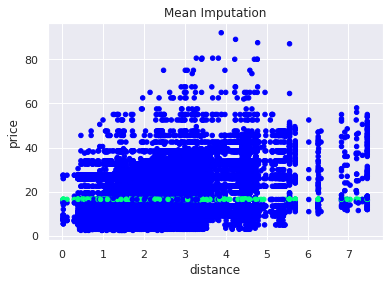

In [35]:
#Scatter plot
fig = plt.Figure()
null_values = df['price'].isnull()
fig = df_mean.plot(x="distance", y='price', kind='scatter', c=null_values, cmap='winter', title='Mean Imputation', colorbar=False)

In [36]:
df_mean.isnull().sum()

hour                       0
day                        0
month                      0
price                      0
distance                   0
surge_multiplier           0
latitude                   0
longitude                  0
temperature                0
apparentTemperature        0
precipIntensity            0
precipProbability          0
humidity                   0
windSpeed                  0
windGust                   0
visibility                 0
temperatureHigh            0
temperatureLow             0
apparentTemperatureHigh    0
apparentTemperatureLow     0
dewPoint                   0
pressure                   0
windBearing                0
cloudCover                 0
uvIndex                    0
visibility.1               0
ozone                      0
moonPhase                  0
precipIntensityMax         0
temperatureMin             0
temperatureMax             0
apparentTemperatureMin     0
dtype: int64

Mode imputation

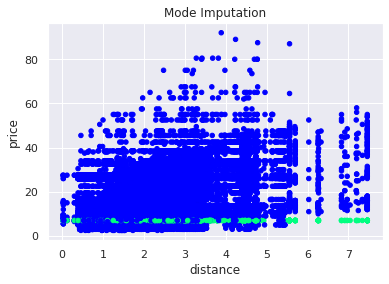

In [37]:
# Mode Imputation

df_mode = numeric_data.copy()
mode_imputer = SimpleImputer(strategy='most_frequent')
df_mode['price'] = mode_imputer.fit_transform(df_mode['price'].values.reshape(-1,1))

# Scatter plot

fig = plt.Figure()
null_values = df['price'].isnull()
fig = df_mode.plot(x='distance', y='price', kind='scatter', c=null_values, cmap='winter', title='Mode Imputation', colorbar=False)


In [38]:
df_mode.head(20)

hour  day  month  price  distance  surge_multiplier  latitude  longitude  \
0      9   16     12    5.0      0.44               1.0   42.2148   -71.0330   
1      2   27     11   11.0      0.44               1.0   42.2148   -71.0330   
2      1   28     11    7.0      0.44               1.0   42.2148   -71.0330   
3      4   30     11   26.0      0.44               1.0   42.2148   -71.0330   
4      3   29     11    9.0      0.44               1.0   42.2148   -71.0330   
5     18   17     12   16.5      0.44               1.0   42.2148   -71.0330   
6      5   26     11   10.5      1.08               1.0   42.3503   -71.0810   
7     19    2     12   16.5      1.08               1.0   42.3503   -71.0810   
8      6    3     12    3.0      1.08               1.0   42.3503   -71.0810   
9     10   27     11   27.5      1.08               1.0   42.3503   -71.0810   
10    16   30     11   13.5      1.08               1.0   42.3503   -71.0810   
11    19   28     11    7.0      1.08               1.0   42.3503   -71.0810   
12    22   30     11   12.0      1.11               1.0   42.3647   -71.0542   
13    10   13     12   16.0      1.11               1.0   42.3647   -71.0542   
14    19   13     12    7.5      1.11               1.0   42.3647   -71.0542   
15    23   16     12    7.5      1.11               1.0   42.3647   -71.0542   
16     0   14     12   26.0      1.11               1.0   42.3647   -71.0542   
17    19   29     11    5.5      1.11               1.0   42.3647   -71.0542   
18    14    1     12    7.0      1.11               1.0   42.3647   -71.0542   
19     6   16     12   11.0      0.72               1.0   42.3661   -71.0631   

    temperature  apparentTemperature  precipIntensity  precipProbability  \
0         42.34                37.12           0.0000               0.00   
1         43.58                37.35           0.1299               1.00   
2         38.33                32.93           0.0000               0.00   
3         34.38                29.63           0.0000               0.00   
4         37.44                30.88           0.0000               0.00   
5         38.75                33.51           0.0000               0.00   
6         41.99                41.99           0.0000               0.00   
7         49.88                49.22           0.0246               1.00   
8         45.58                45.58           0.0000               0.00   
9         45.45                41.77           0.0624               1.00   
10        40.13                38.00           0.0000               0.00   
11        41.47                35.66           0.0000               0.00   
12        40.13                38.08           0.0000               0.00   
13        20.38                20.38           0.0000               0.00   
14        32.85                32.85           0.0000               0.00   
15        41.29                36.01           0.0567               0.94   
16        31.25                31.25           0.0000               0.00   
17        43.49                37.19           0.0000               0.00   
18        36.99                32.27           0.0000               0.00   
19        40.36                35.52           0.0000               0.00   

    humidity  windSpeed  windGust  visibility  temperatureHigh  \
0       0.68       8.66      9.17      10.000            43.68   
1       0.94      11.98     11.98       4.786            47.30   
2       0.75       7.33      7.33      10.000            47.55   
3       0.73       5.28      5.28      10.000            45.03   
4       0.70       9.14      9.14      10.000            42.18   
5       0.84       7.19      8.88       8.325            40.61   
6       0.91       0.53      0.88       4.675            46.46   
7       0.93       3.38      3.38       3.052            50.80   
8       0.96       1.25      2.09       1.413            57.02   
9       0.93       6.87      7.42       2.686            46.91   


In [39]:
df_mode.isnull().sum()

hour                       0
day                        0
month                      0
price                      0
distance                   0
surge_multiplier           0
latitude                   0
longitude                  0
temperature                0
apparentTemperature        0
precipIntensity            0
precipProbability          0
humidity                   0
windSpeed                  0
windGust                   0
visibility                 0
temperatureHigh            0
temperatureLow             0
apparentTemperatureHigh    0
apparentTemperatureLow     0
dewPoint                   0
pressure                   0
windBearing                0
cloudCover                 0
uvIndex                    0
visibility.1               0
ozone                      0
moonPhase                  0
precipIntensityMax         0
temperatureMin             0
temperatureMax             0
apparentTemperatureMin     0
dtype: int64

KNN

In [40]:
# Imputing with KNNImputer

from sklearn.impute import KNNImputer

#Define a subset of the dataset
df_knn = numeric_data.filter(['distance','surge_multiplier','price'], axis=1).copy()


# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

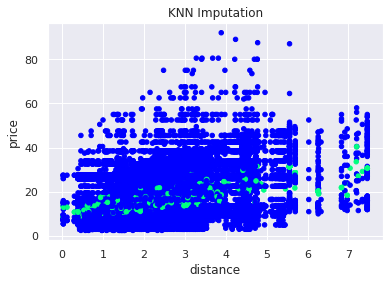

In [41]:
fig = plt.Figure()
null_values = df['price'].isnull() 
fig = df_knn_imputed.plot(x='distance', y='price', kind='scatter', c=null_values, cmap='winter', title='KNN Imputation', colorbar=False)

In [42]:
df_knn_imputed.head(20)

distance  surge_multiplier  price
0       0.44               1.0    5.0
1       0.44               1.0   11.0
2       0.44               1.0    7.0
3       0.44               1.0   26.0
4       0.44               1.0    9.0
5       0.44               1.0   16.5
6       1.08               1.0   10.5
7       1.08               1.0   16.5
8       1.08               1.0    3.0
9       1.08               1.0   27.5
10      1.08               1.0   13.5
11      1.08               1.0    7.0
12      1.11               1.0   12.0
13      1.11               1.0   16.0
14      1.11               1.0    7.5
15      1.11               1.0    7.5
16      1.11               1.0   26.0
17      1.11               1.0    5.5
18      1.11               1.0   15.2
19      0.72               1.0   11.0

In [43]:
df_knn_imputed.isnull().sum()

distance            0
surge_multiplier    0
price               0
dtype: int64

Text(0.5, 0, 'price')

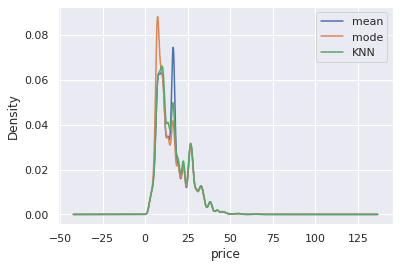

In [44]:
df_mean.price.plot(kind="kde")
df_mode.price.plot(kind="kde")
df_knn_imputed.price.plot(kind="kde")
plt.legend(["mean", "mode", "KNN"])
plt.xlabel("price")

Q4)Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Firstly, I will use the following methods who determine which independent variables are important to predict my target variable(i.e.price)

4.1) Finding Correlation with the target variable using correlation matrix

In [47]:
df.drop(['price'], axis=1, inplace=True)

# Add column 'F' from df2 to df1
df['price'] = df_knn_imputed['price']


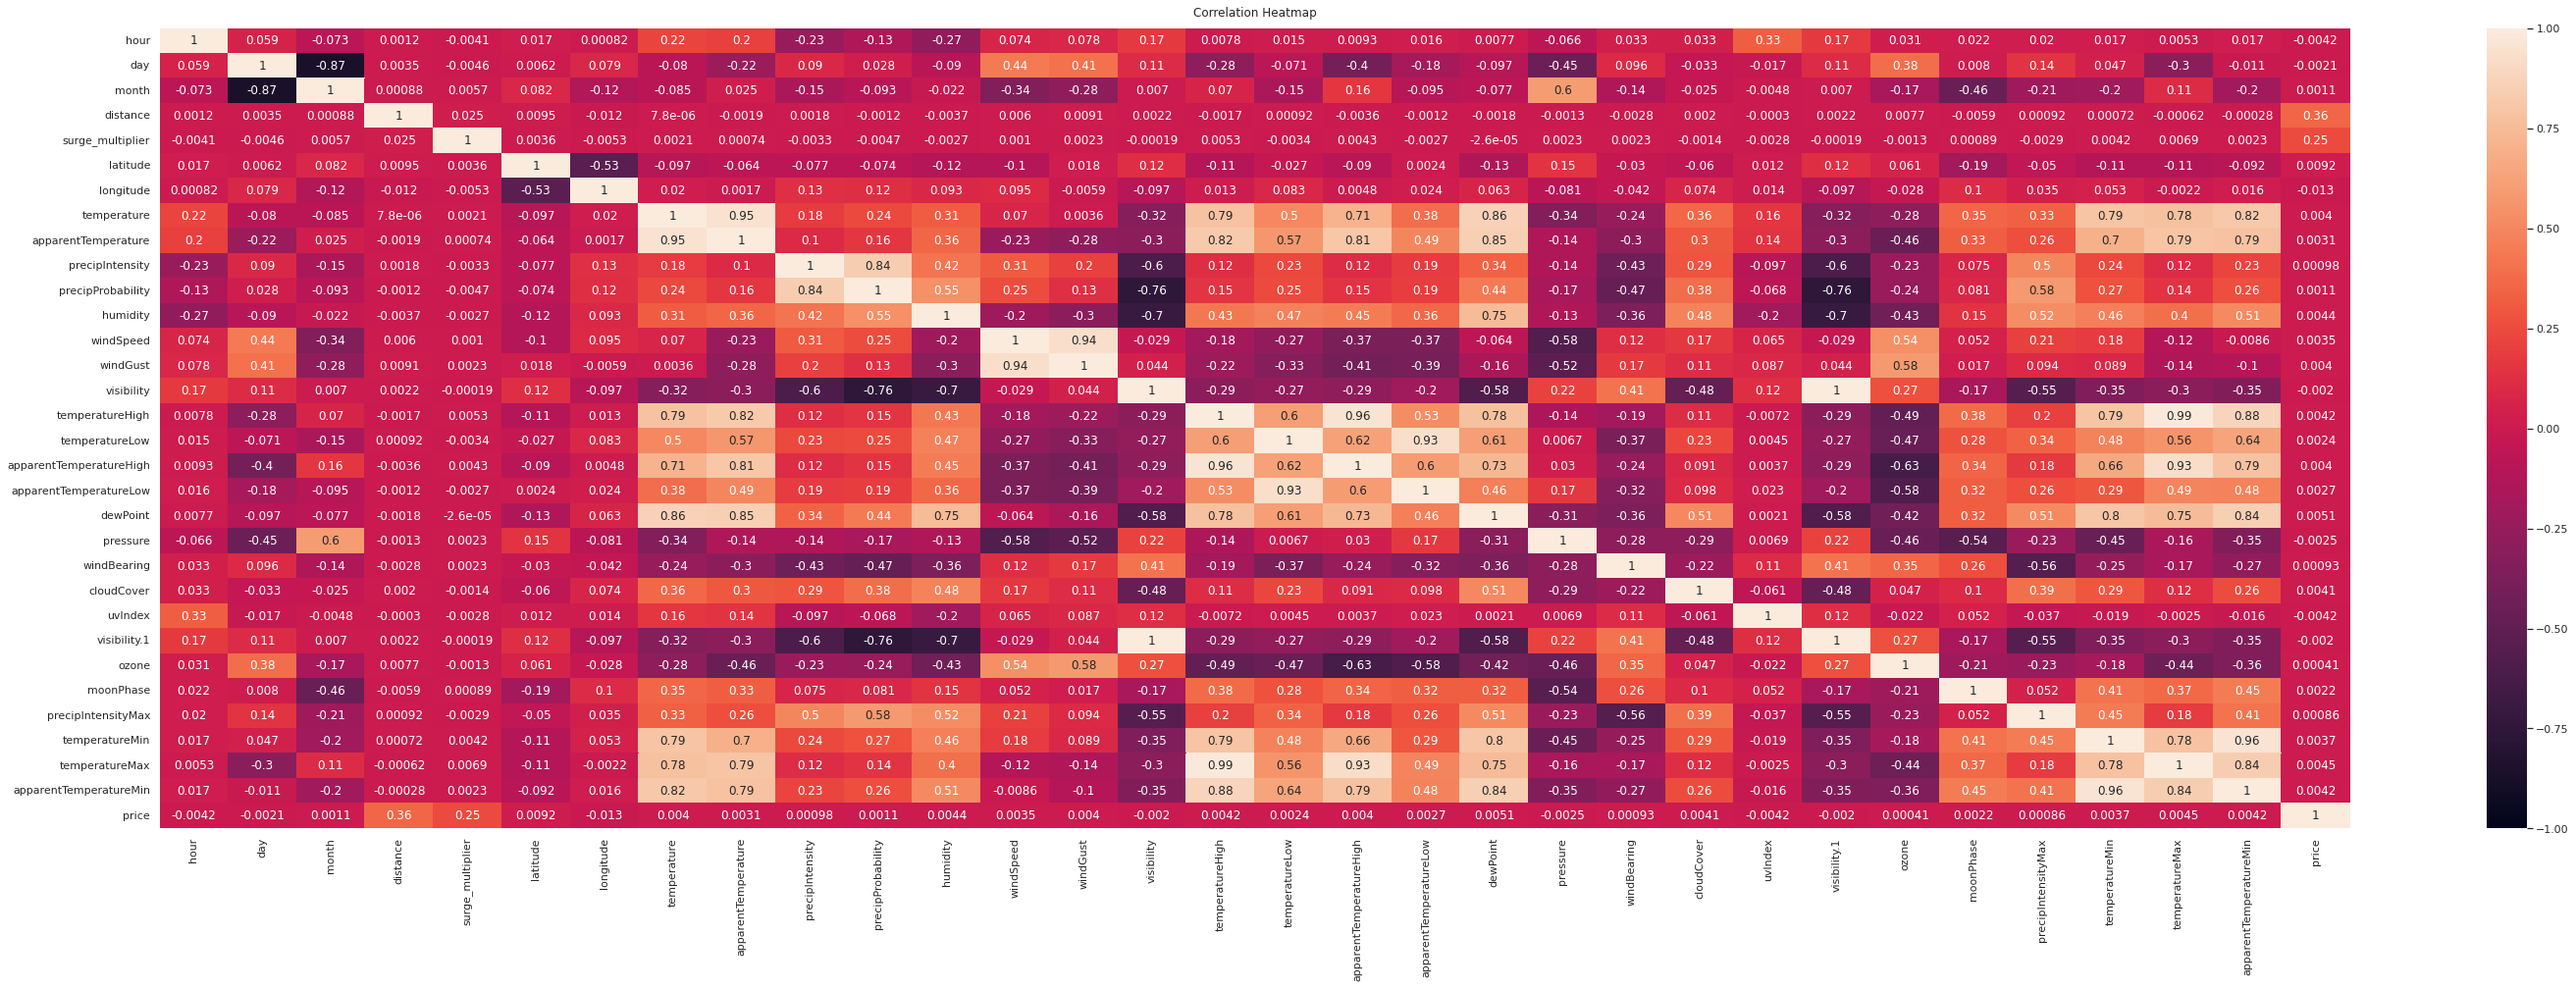

In [48]:
plt.figure(figsize=(50, 15))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

4.2) Stepwise Regression

In [99]:
df.head(20)

hour  day  month          timezone            source  \
0      9   16     12  America/New_York  Haymarket Square   
1      2   27     11  America/New_York  Haymarket Square   
2      1   28     11  America/New_York  Haymarket Square   
3      4   30     11  America/New_York  Haymarket Square   
4      3   29     11  America/New_York  Haymarket Square   
5     18   17     12  America/New_York  Haymarket Square   
6      5   26     11  America/New_York          Back Bay   
7     19    2     12  America/New_York          Back Bay   
8      6    3     12  America/New_York          Back Bay   
9     10   27     11  America/New_York          Back Bay   
10    16   30     11  America/New_York          Back Bay   
11    19   28     11  America/New_York          Back Bay   
12    22   30     11  America/New_York         North End   
13    10   13     12  America/New_York         North End   
14    19   13     12  America/New_York         North End   
15    23   16     12  America/New_York         North End   
16     0   14     12  America/New_York         North End   
17    19   29     11  America/New_York         North End   
18    14    1     12  America/New_York         North End   
19     6   16     12  America/New_York     North Station   

                destination cab_type                            product_id  \
0             North Station     Lyft                             lyft_line   
1             North Station     Lyft                          lyft_premier   
2             North Station     Lyft                                  lyft   
3             North Station     Lyft                           lyft_luxsuv   
4             North Station     Lyft                             lyft_plus   
5             North Station     Lyft                              lyft_lux   
6   Northeastern University     Lyft                             lyft_plus   
7   Northeastern University     Lyft                              lyft_lux   
8   Northeastern University     Lyft                             lyft_line   
9   Northeastern University     Lyft                           lyft_luxsuv   
10  Northeastern University     Lyft                          lyft_premier   
11  Northeastern University     Lyft                                  lyft   
12                 West End     Uber  6f72dfc5-27f1-42e8-84db-ccc7a75f6969   
13                 West End     Uber  6c84fd89-3f11-4782-9b50-97c468b19529   
14                 West End     Uber  55c66225-fbe7-4fd5-9072-eab1ece5e23e   
15                 West End     Uber  9a0e7b09-b92b-4c41-9779-2ad22b4d779d   
16                 West End     Uber  6d318bcc-22a3-4af6-bddd-b409bfce1546   
17                 West End     Uber  997acbb5-e102-41e1-b155-9df7de0a73f2   
18                 West End     Uber  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a   
19         Haymarket Square     Lyft                             lyft_plus   

            name  distance  surge_multiplier  latitude  longitude  \
0         Shared      0.44               1.0   42.2148   -71.0330   
1            Lux      0.44               1.0   42.2148   -71.0330   
2           Lyft      0.44               1.0   42.2148   -71.0330   
3   Lux Black XL      0.44               1.0   42.2148   -71.0330   
4        Lyft XL      0.44               1.0   42.2148   -71.0330   
5      Lux Black      0.44               1.0   42.2148   -71.0330   
6        Lyft XL      1.08               1.0   42.3503   -71.0810   
7      Lux Black      1.08               1.0   42.3503   -71.0810   
8         Shared      1.08               1.0   42.3503   -71.0810   
9   Lux Black XL      1.08               1.0   42.3503   -71.0810   
10           Lux      1.08               1.0   42.3503   -71.0810   
11          Lyft      1.08               1.0   42.3503   -71.0810   
12        UberXL      1.11               1.0   42.3647   -71.0542   
13         Black      1.11               1.0   42.3647   -71.0542   
14         UberX      1.11               1.0   42.3647   -71.0542   


Since this step only can take numerical values, we create a subset of the dataframe containing only the numerical values


In [50]:
pd.options.mode.chained_assignment = None  
numeric_data.drop(['price'], axis=1, inplace=True)

numeric_data['price'] = df_knn_imputed['price']

In [51]:
import statsmodels.api as sm
model = sm.OLS(numeric_data.price, numeric_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.736e+31
Date:                Sun, 05 Feb 2023   Prob (F-statistic):                        0.00
Time:                        01:27:26   Log-Likelihood:                      1.8459e+06
No. Observations:               65535   AIC:                                 -3.692e+06
Df Residuals:                   65504   BIC:                                 -3.691e+06
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
hour                    -2.449e-16   1.01e-16     -2.434      0.015   -4.42e-16   -4.77e-17
day                     -2.017e-16   3.57e-16     -0.565      0.572   -9.01e-16    4.98e-16
month                    2.416e-15   8.09e-15      0.299      0.765   -1.34e-14    1.83e-14
distance                -2.201e-15   5.22e-16     -4.215      0.000   -3.22e-15   -1.18e-15
surge_multiplier        -2.155e-14   6.11e-15     -3.527      0.000   -3.35e-14   -9.57e-15
latitude                -1.394e-14   1.48e-14     -0.942      0.346   -4.29e-14    1.51e-14
longitude               -9.249e-15   9.58e-15     -0.966      0.334    -2.8e-14    9.52e-15
temperature              1.271e-16   2.09e-15      0.061      0.952   -3.97e-15    4.23e-15
apparentTemperature     -4.451e-16   7.31e-16     -0.609      0.542   -1.88e-15    9.87e-16
precipIntensity         -1.017e-13   4.45e-14     -2.286      0.022   -1.89e-13   -1.45e-14
precipProbability        7.851e-15   4.32e-15      1.819      0.069    -6.1e-16    1.63e-14
humidity                 4.271e-15    6.5e-14      0.066      0.948   -1.23e-13    1.32e-13
windSpeed                1.603e-16   8.74e-16      0.183      0.854   -1.55e-15    1.87e-15
windGust                -5.594e-17   4.08e-16     -0.137      0.891   -8.55e-16    7.44e-16
visibility               1.744e-17   2.41e-16      0.072      0.942   -4.55e-16     4.9e-16
temperatureHigh          1.433e-16   1.82e-15      0.079      0.937   -3.43e-15    3.72e-15
temperatureLow          -2.454e-16   5.01e-16     -0.490      0.624   -1.23e-15    7.36e-16
apparentTemperatureHigh  -1.73e-16   5.54e-16     -0.312      0.755   -1.26e-15    9.13e-16
apparentTemperatureLow   2.895e-16   4.14e-16      0.699      0.485   -5.22e-16     1.1e-15
dewPoint                -6.604e-16   1.82e-15     -0.363      0.717   -4.23e-15    2.91e-15
pressure                 8.168e-17   1.63e-16      0.501      0.616   -2.38e-16    4.01e-16
windBearing              8.284e-19   1.02e-17      0.081      0.935   -1.91e-17    2.08e-17
cloudCover               1.159e-15   2.46e-15      0.470      0.638   -3.67e-15    5.99e-15
uvIndex                 -1.976e-16   1.36e-15     -0.145      0.884   -2.86e-15    2.47e-15
visibility.1            -1.439e-17   2.41e-16     -0.060      0.952   -4.87e-16    4.58e-16
ozone                     -7.2e-17   5.73e-17     -1.256      0.209   -1.84e-16    4.03e-17
moonPhase               -2.292e-15   9.61e-15     -0.238      0.812   -2.11e-14    1.65e-14
precipIntensityMax       9.912e-15   2.19e-14      0.452      0.651   -3.31e-14    5.29e-14
temperatureMin           5.525e-16   6.01e-16      0.919      0.358   -6.26e-16    1.73e-15
temperatureMax           4.677e-16   1.2

4.3) Feature Selection(Random Forest Regressor)


In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [53]:
#creating a subset separate the other attributes from the predicting attribute
x = numeric_data.drop("price",axis=1)
#separte the predicting attribute into Y for model training 
y = numeric_data["price"]

In [54]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [55]:
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestRegressor())

In [56]:
sel.get_support()

array([False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [57]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

2

In [58]:
print(selected_feat)

Index(['distance', 'surge_multiplier'], dtype='object')


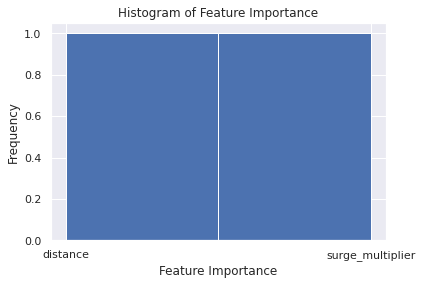

In [59]:
plt.hist(selected_feat, bins=2)
plt.xticks([0, 1])
plt.xlabel("Feature Importance")
plt.ylabel("Frequency")
plt.title("Histogram of Feature Importance")
plt.show()

4.4)Feature selection using XG Boost

In [60]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [61]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [62]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [63]:
xg_reg.fit(x_train,y_train)

preds = xg_reg.predict(x_test)

[01:28:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [64]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 10.356346


In [65]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[01:28:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [66]:
cv_results.head()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0        16.998861        0.006663       17.000803       0.014411
1        15.765295        0.042394       15.769065       0.038660
2        14.692300        0.037180       14.694957       0.049567
3        13.761322        0.065050       13.766501       0.067185
4        12.919731        0.027518       12.924755       0.035290

In [67]:
print((cv_results["test-rmse-mean"]).tail(1))

49    8.21241
Name: test-rmse-mean, dtype: float64


In [68]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[01:28:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


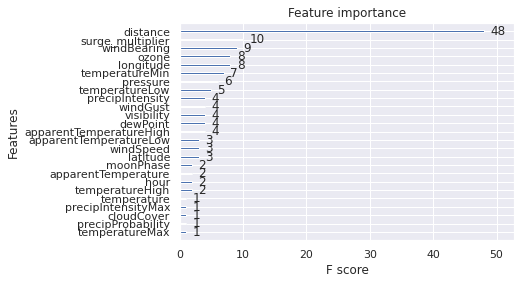

In [69]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

Observations:-

*   Used correlation matrix, step-wise regression, random forest regressor and Xg boost to select the best features the predict the target variable i.e Price
*   Distance and surge_multiplier are the only independent 2 variables which are selected from the feature selection models

Distribution of Predictor Variable

Q7)In the predictor variables independent of all the other predictor variables?

From the pairplot below, we can see that surge multiplier and distance,which are the predictor variables, have no collinearity between them and are independent of each other

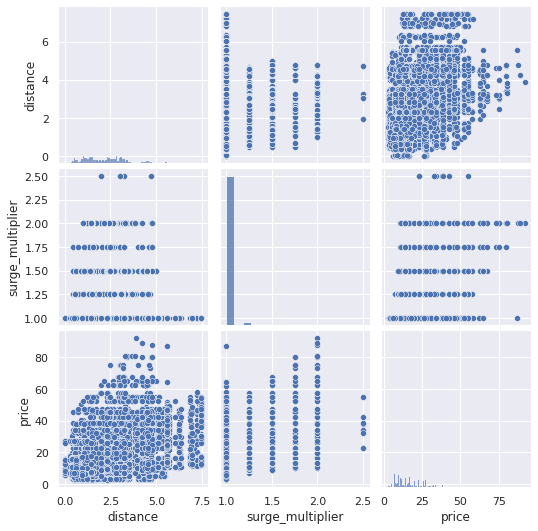

In [94]:
df.pred = numeric_data.filter(['distance','surge_multiplier','price'], axis=1).copy()
sns.pairplot(df.pred) 

Q9)Do the ranges of the predictor variables make sense?



In [108]:
max_value_distance = df['distance'].max()
min_value_distance = df['distance'].min()

In [110]:
print(max_value_distance)
print(min_value_distance)

7.46
0.02


In [111]:
max_value_surge = df['surge_multiplier'].max()
min_value_surge = df['surge_multiplier'].min()

In [112]:
print(max_value_surge)
print(min_value_surge)

2.5
1.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



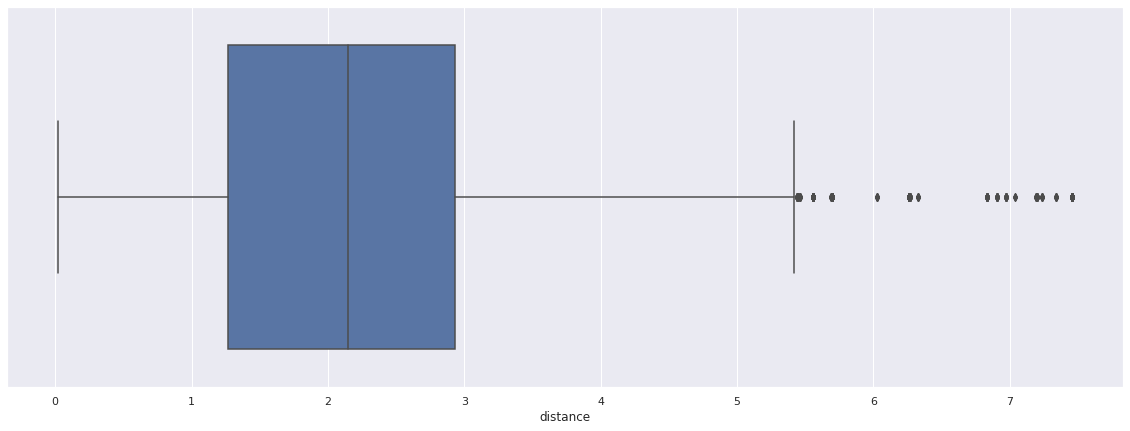

In [114]:
plt.figure(figsize=(20,7))
sns.boxplot(df['distance'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



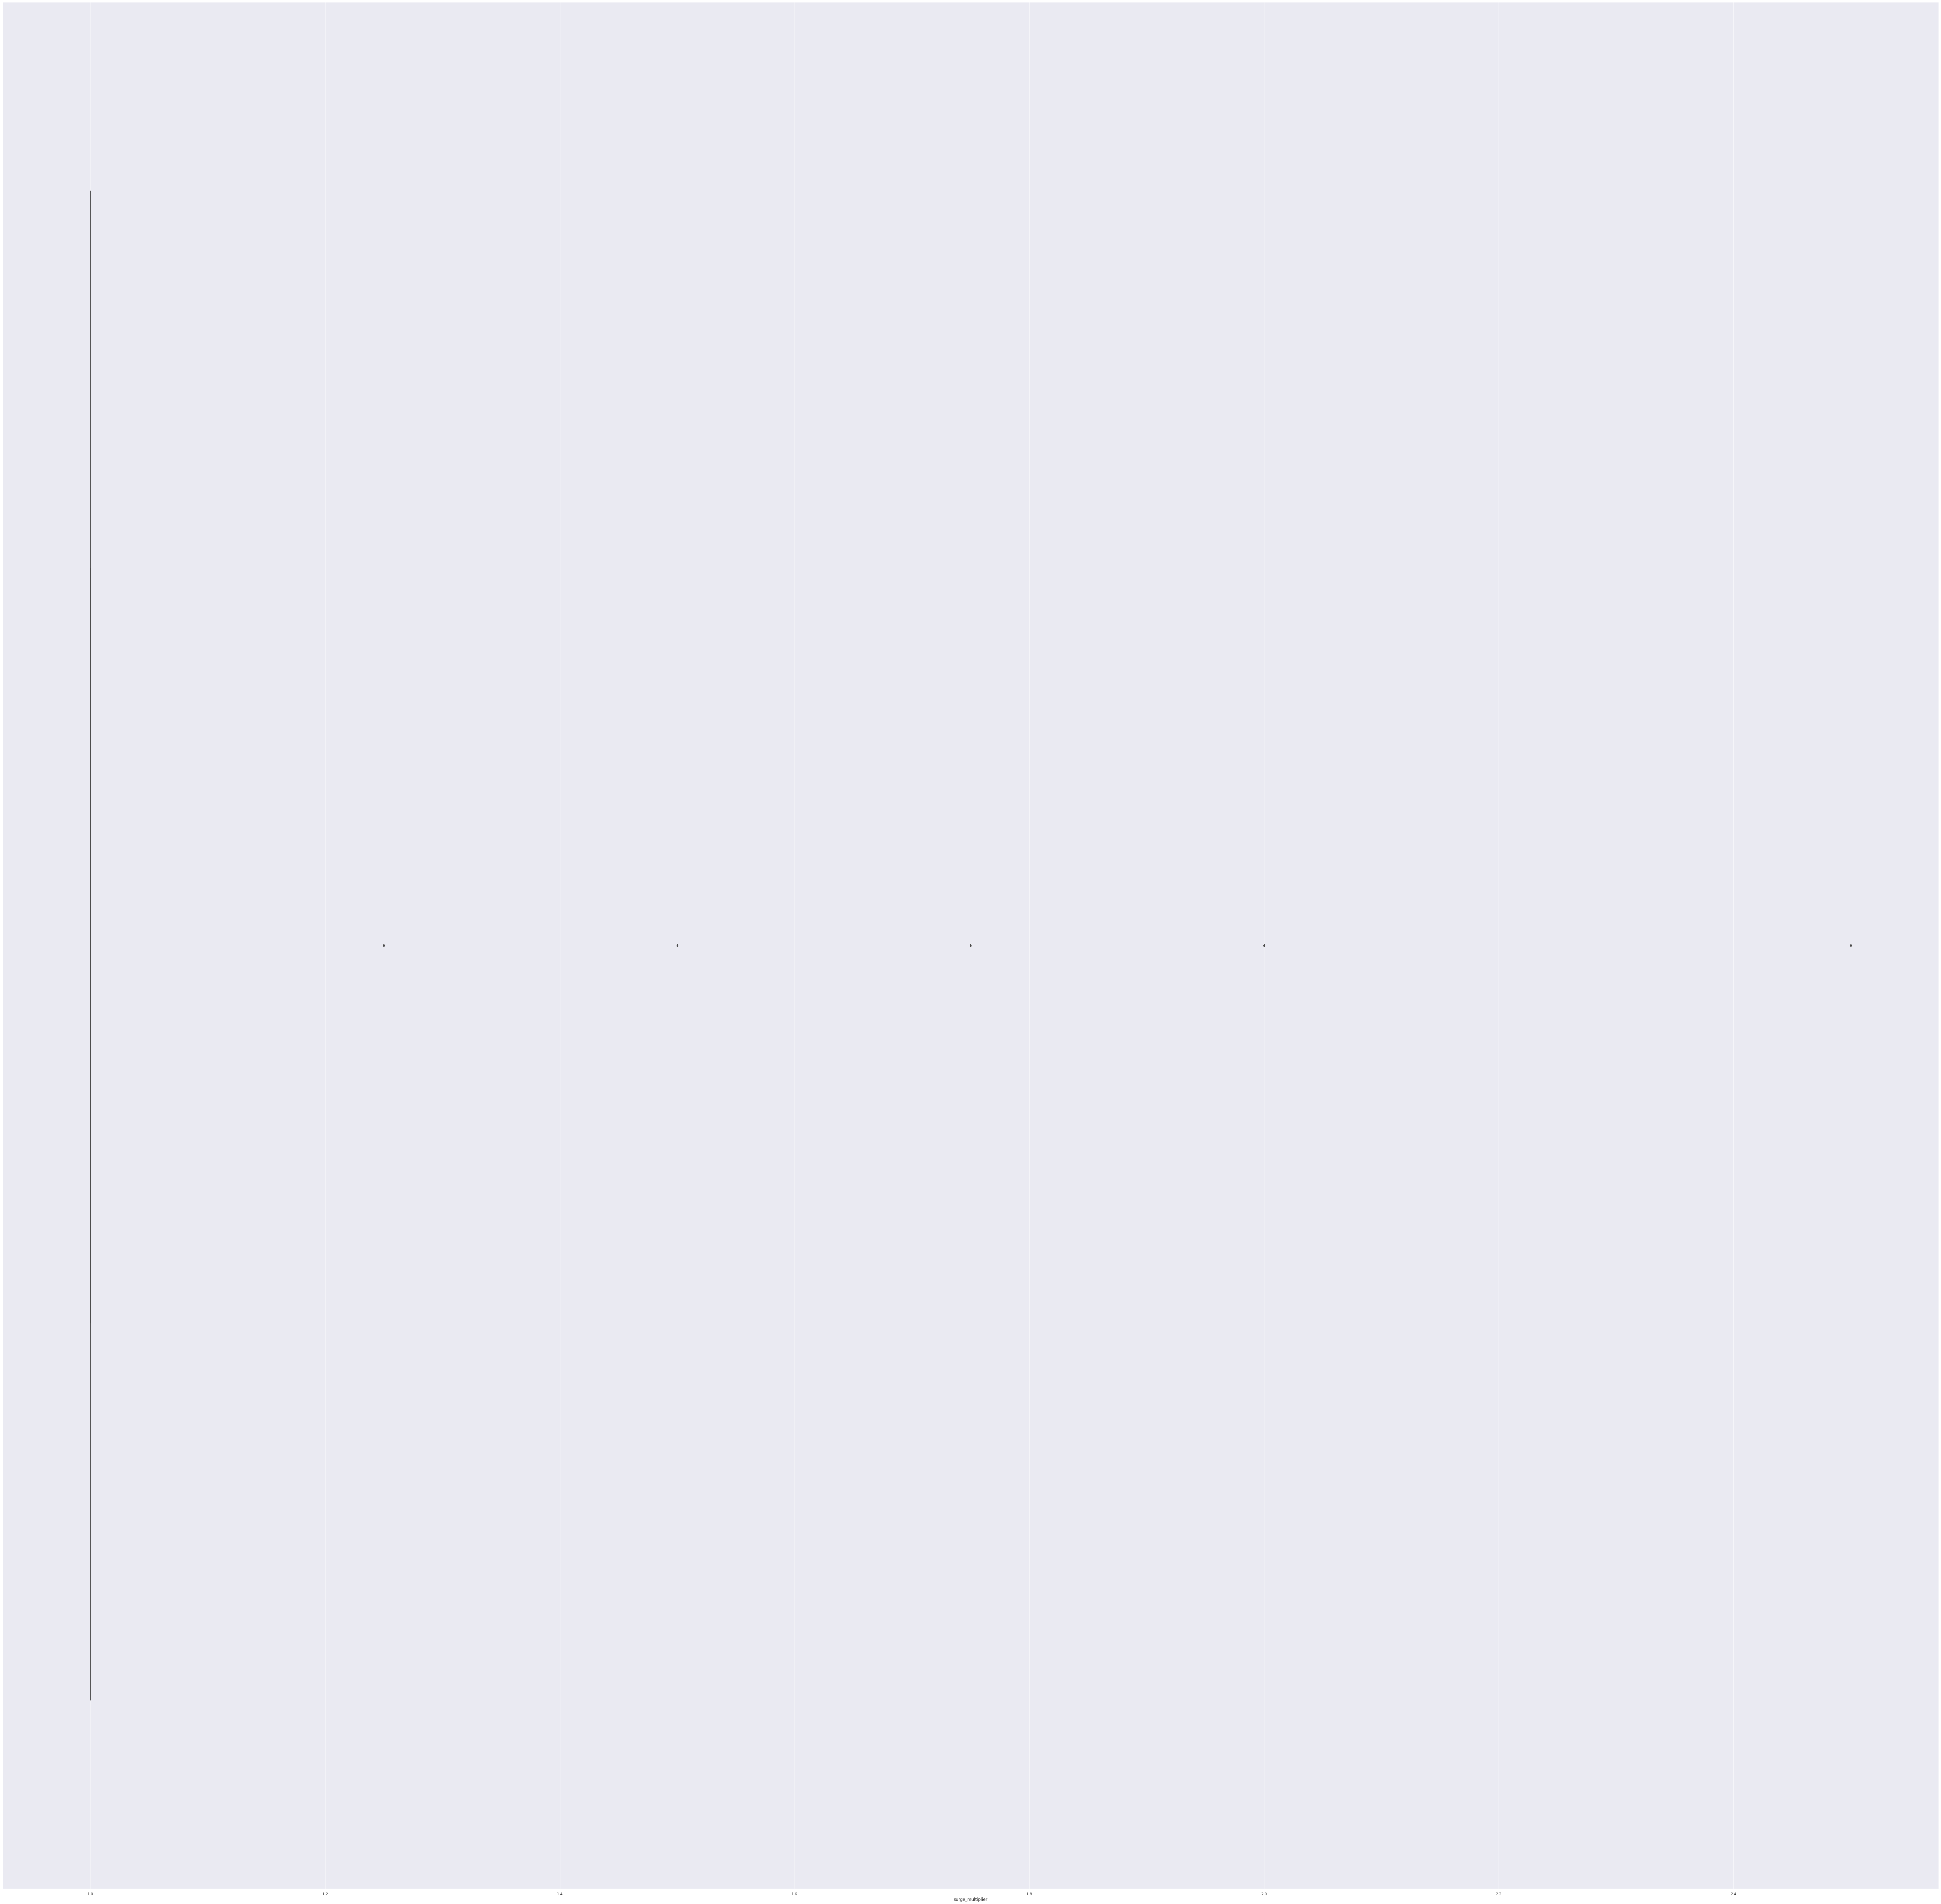

In [115]:
sns.boxplot(df['surge_multiplier'])

Q10)What are the distributions of the predictor variables?

distance:- right skew distribution

surge_multiplier :- step wise distribution

<Figure size 576x360 with 0 Axes>

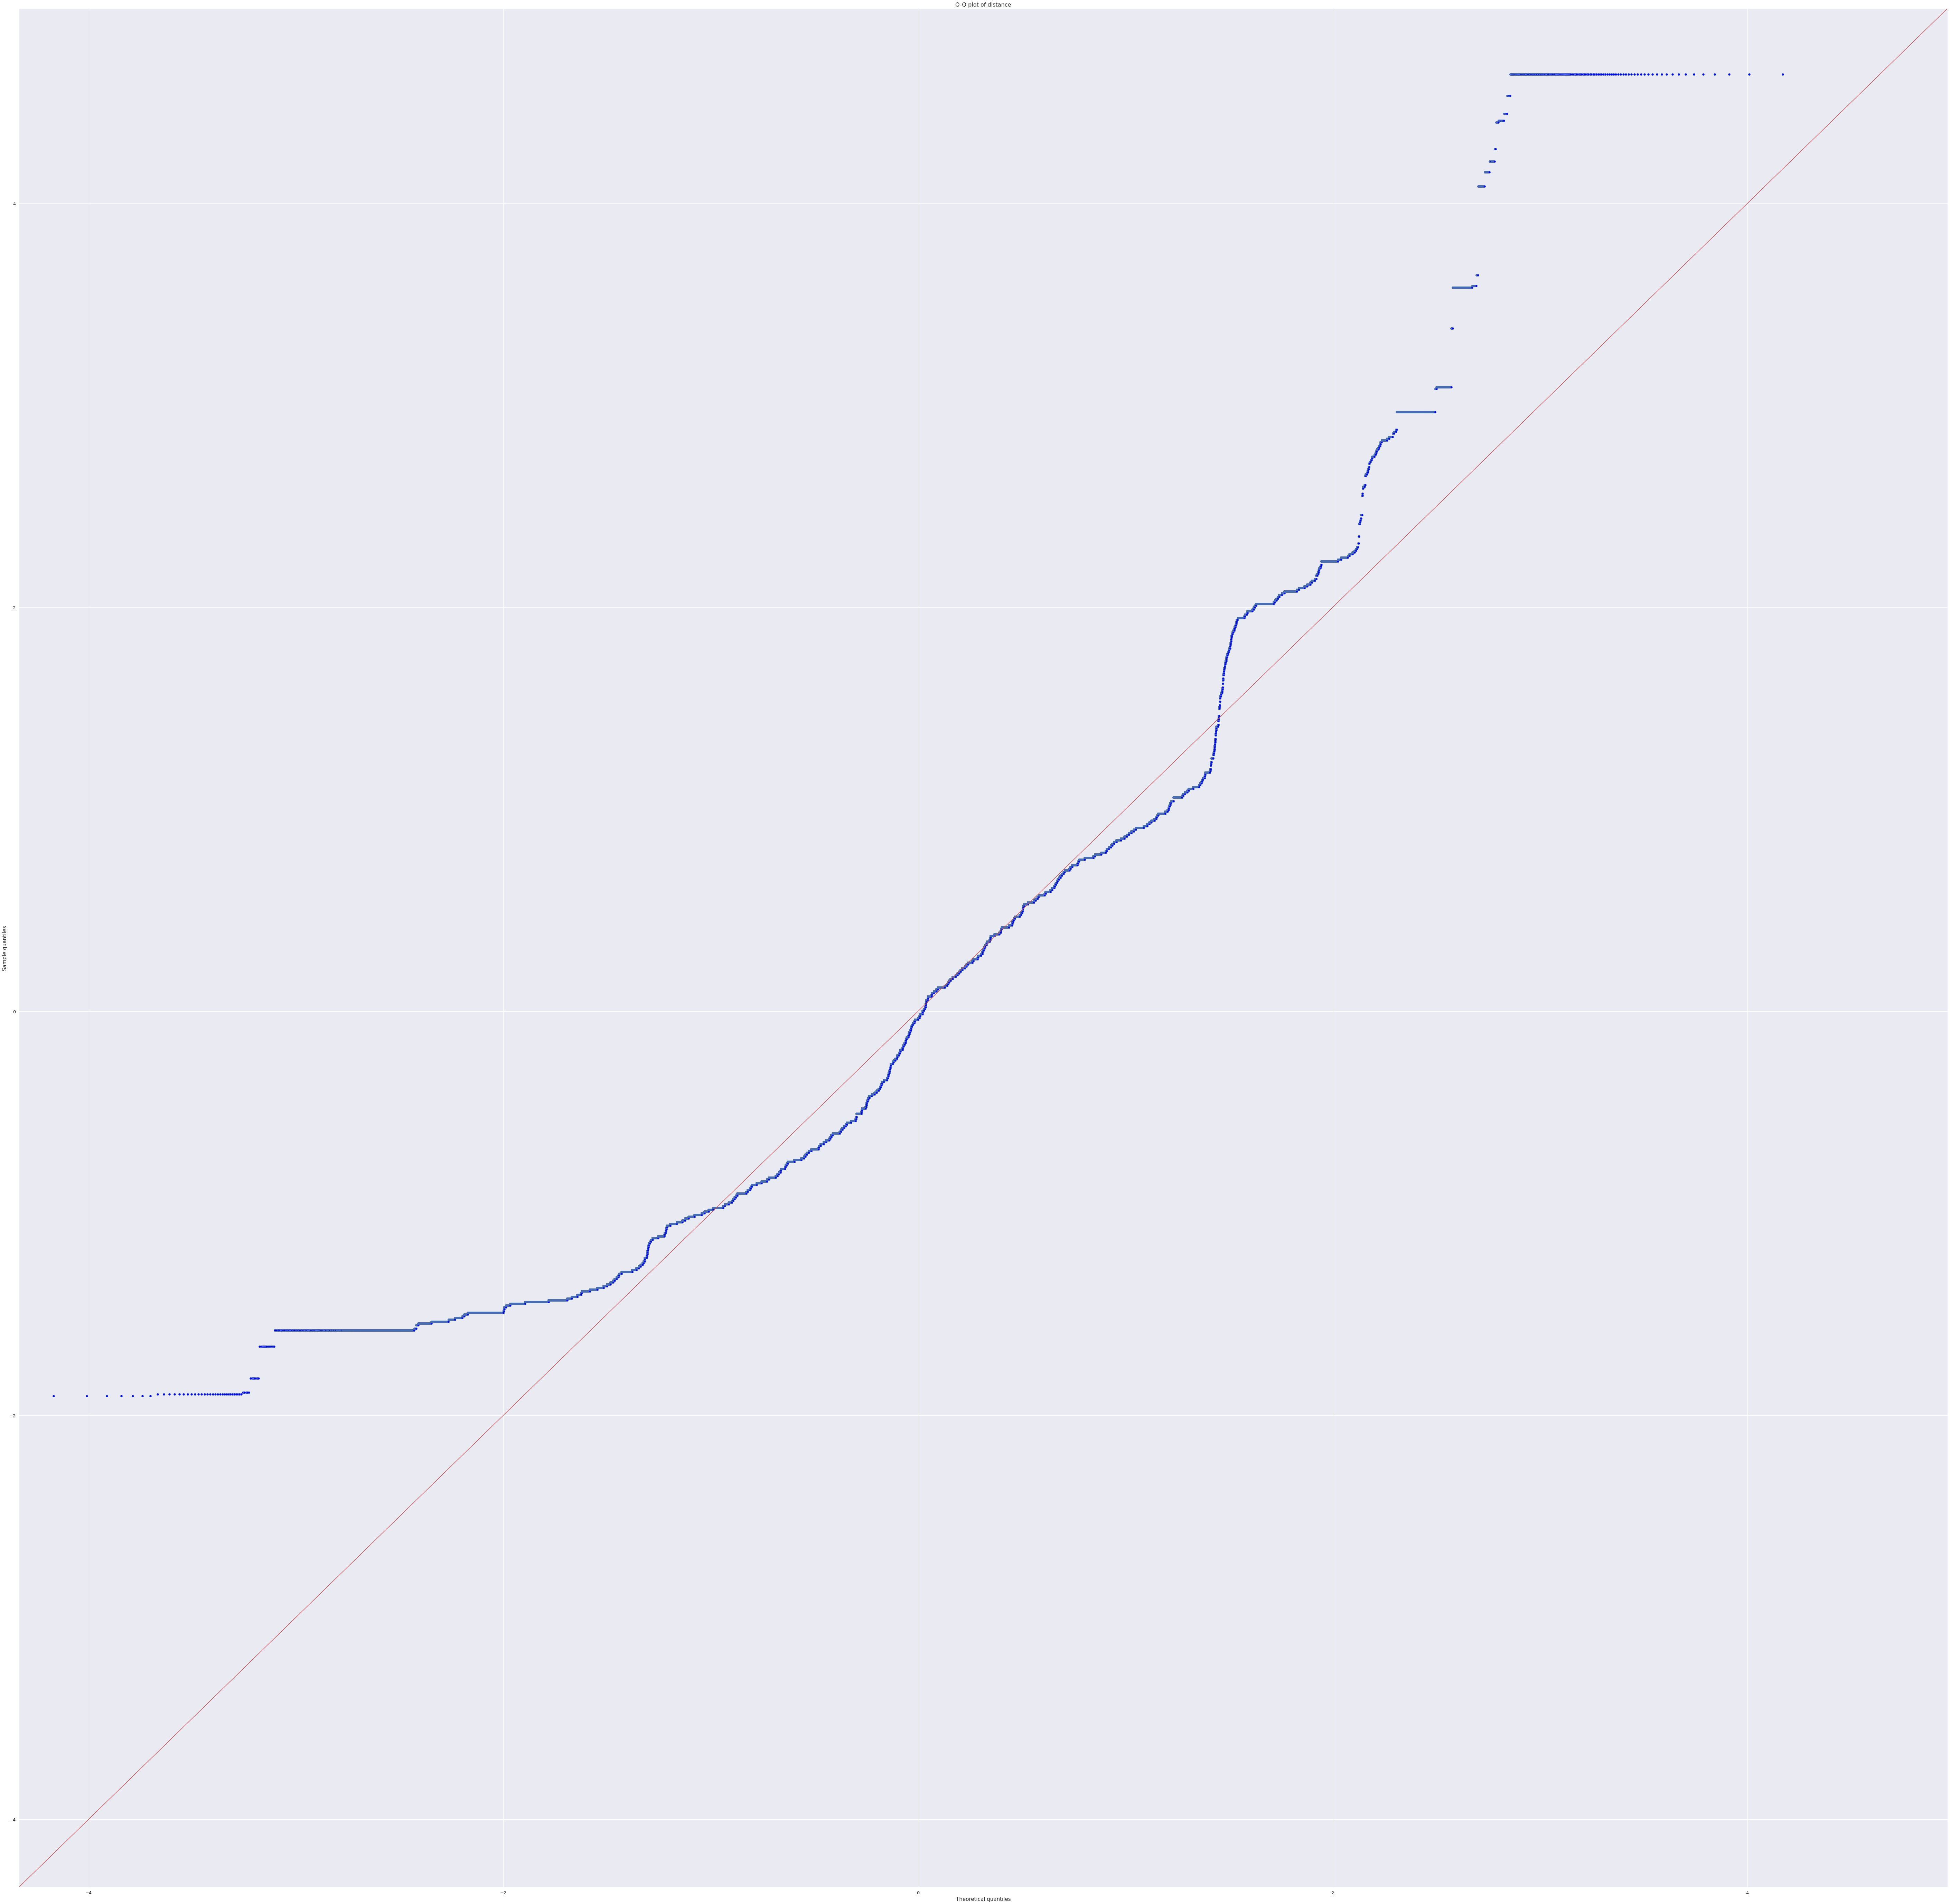

<Figure size 576x360 with 0 Axes>

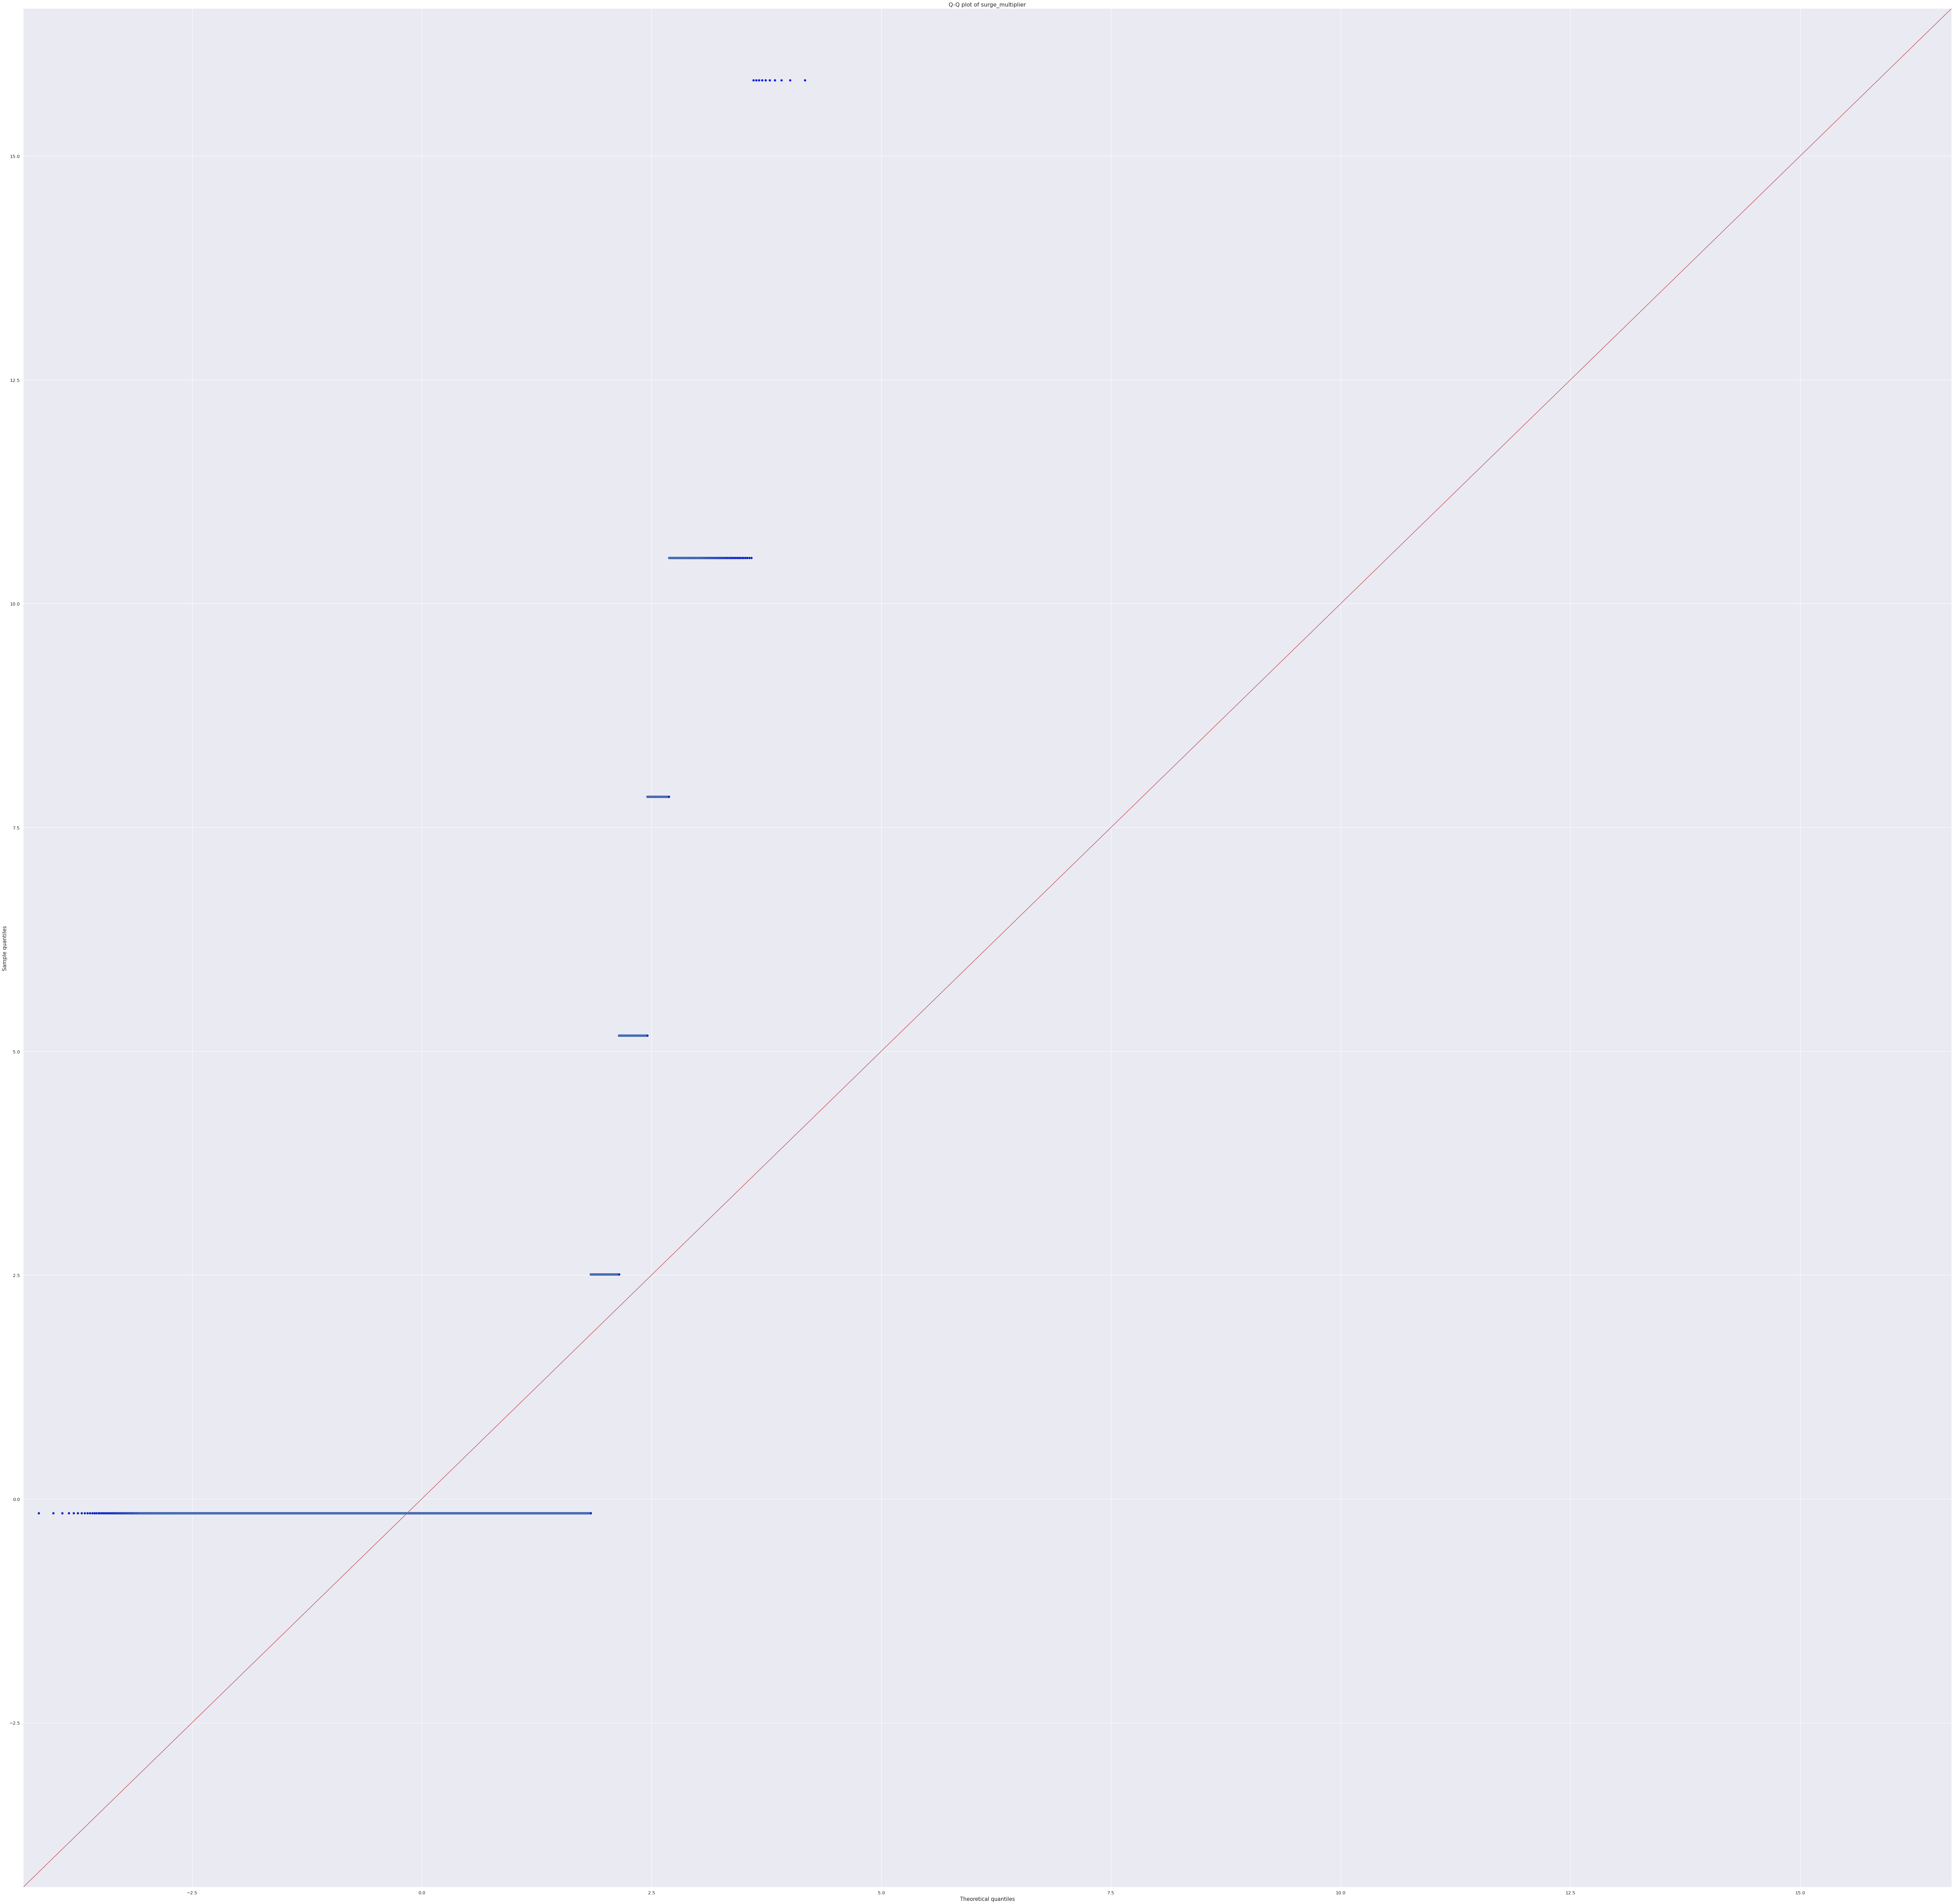

In [101]:
from statsmodels.graphics.gofplots import qqplot
data_col = numeric_data[['distance','surge_multiplier']]
for c in data_col.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_col[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

Building a model using Linear Regression

Since we know which predictor variables are important , we use them to predict our target variable. Firstly, we encode the categorical columns to numerical outputs using One-hot encoding . Secondly , we check the accuracy with the outliers and after that compare it with data without the outliers

In [72]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [73]:
new_cat = ['hour','source',
 'destination',
 'cab_type',
 'name','distance','surge_multiplier','precipIntensity','price']

df_cat = df[new_cat]
df_cat.head()

hour            source    destination cab_type          name  distance  \
0     9  Haymarket Square  North Station     Lyft        Shared      0.44   
1     2  Haymarket Square  North Station     Lyft           Lux      0.44   
2     1  Haymarket Square  North Station     Lyft          Lyft      0.44   
3     4  Haymarket Square  North Station     Lyft  Lux Black XL      0.44   
4     3  Haymarket Square  North Station     Lyft       Lyft XL      0.44   

   surge_multiplier  precipIntensity  price  
0               1.0           0.0000    5.0  
1               1.0           0.1299   11.0  
2               1.0           0.0000    7.0  
3               1.0           0.0000   26.0  
4               1.0           0.0000    9.0

In [74]:
def one_hot_encoder(df_cat,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(df_cat[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([df_cat,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [75]:
new_df_onehot= df_cat.copy()
for col in new_df_onehot.select_dtypes(include='O').columns:
    new_df_onehot=one_hot_encoder(new_df_onehot,col)
    
new_df_onehot.head()

hour  distance  surge_multiplier  precipIntensity  price  source_Back Bay  \
0     9      0.44               1.0           0.0000    5.0                0   
1     2      0.44               1.0           0.1299   11.0                0   
2     1      0.44               1.0           0.0000    7.0                0   
3     4      0.44               1.0           0.0000   26.0                0   
4     3      0.44               1.0           0.0000    9.0                0   

   source_Beacon Hill  source_Boston University  source_Fenway  \
0                   0                         0              0   
1                   0                         0              0   
2                   0                         0              0   
3                   0                         0              0   
4                   0                         0              0   

   source_Financial District  source_Haymarket Square  source_North End  \
0                          0                        1                 0   
1                          0                        1                 0   
2                          0                        1                 0   
3                          0                        1                 0   
4                          0                        1                 0   

   source_North Station  source_Northeastern University  source_South Station  \
0                     0                               0                     0   
1                     0                               0                     0   
2                     0                               0                     0   
3                     0                               0                     0   
4                     0                               0                     0   

   source_Theatre District  source_West End  destination_Back Bay  \
0                        0                0                     0   
1                        0                0                     0   
2                        0                0                     0   
3                        0                0                     0   
4                        0                0                     0   

   destination_Beacon Hill  destination_Boston University  destination_Fenway  \
0                        0                              0                   0   
1                        0                              0                   0   
2                        0                              0                   0   
3                        0                              0                   0   
4                        0                              0                   0   

   destination_Financial District  destination_Haymarket Square  \
0                               0                             0   
1                               0                             0   
2                               0                             0   
3                               0                             0   
4                               0                             0   

   destination_North End  destination_North Station  \
0                      0                          1   
1                      0                          1   
2                      0                          1   
3                      0                          1   
4                      0                          1   

   destination_Northeastern University  destination_South Station  \
0                                    0                          0   
1                                    0                          0   
2                                    0                          0   
3                                    0                          0   
4                                    0                          0   

   destination_Theatre District  destination_West End  cab_type_Lyft  \
0                             0                     0           

In [76]:
from sklearn.model_selection import train_test_split
X = new_df_onehot.drop(columns=['price'],axis=1).values
y = new_df_onehot['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Q6)Do the training and test sets have the same data?


Check if training and test data have the same distribution

In [102]:
def check_same_data(X_train, X_test):
    # Convert data to pandas DataFrames if necessary
    X_train = pd.DataFrame(X_train) if not isinstance(X_train, pd.DataFrame) else X_train
    X_test = pd.DataFrame(X_test) if not isinstance(X_test, pd.DataFrame) else X_test

    # Check if the number of columns in the training and test data is the same
    if X_train.shape[1] != X_test.shape[1]:
        return False

    # Check if the columns in the training and test data are the same
    for col in X_train.columns:
        if col not in X_test.columns:
            return False

    # Calculate the mean and standard deviation of each column in the training data
    train_mean = X_train.mean()
    train_std = X_train.std()

    # Calculate the mean and standard deviation of each column in the test data
    test_mean = X_test.mean()
    test_std = X_test.std()

    # Check if the mean and standard deviation of each column in the training and test data are the same
    for col in X_train.columns:
        if not np.isclose(train_mean[col], test_mean[col], rtol=1e-5) or not np.isclose(train_std[col], test_std[col], rtol=1e-5):
            return False

    return True
 

In [103]:
result = check_same_data(X_train, X_test)

if result:
    print("The training and test data have the same data.")
else:
    print("The training and test data do not have the same data.")

The training and test data do not have the same data.


Fitting the model with data

In [79]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [80]:
model = reg.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [81]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9190240818948315

In [82]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

6.6310165656256395
2.575076031037849


Without outliers

In [83]:
Qp12 = new_df_onehot['price'].quantile(0.25)
Qp32 = new_df_onehot['price'].quantile(0.75)
IQRp = Qp32-Qp12

In [84]:
new_df_onehot[new_df_onehot['price']>(Qp32+(1.5*IQRp))]

hour  distance  surge_multiplier  precipIntensity  price  \
469       1      2.93              1.25           0.0000   42.5   
639       5      3.80              1.00           0.0000   42.5   
705      13      3.25              2.50           0.0006   42.5   
706      10      3.25              2.00           0.0000   52.5   
707       2      3.25              2.00           0.0000   67.5   
...     ...       ...               ...              ...    ...   
65101    10      5.09              1.00           0.0000   52.5   
65102    21      5.09              1.00           0.0000   42.5   
65268    17      4.68              1.00           0.0000   42.5   
65335     9      4.51              1.50           0.0000   65.0   
65336    14      4.51              1.50           0.0000   45.5   

       source_Back Bay  source_Beacon Hill  source_Boston University  \
469                  0                   0                         1   
639                  0                   0                         0   
705                  0                   0                         0   
706                  0                   0                         0   
707                  0                   0                         0   
...                ...                 ...                       ...   
65101                0                   0                         0   
65102                0                   0                         0   
65268                0                   0                         1   
65335                0                   0                         0   
65336                0                   0                         0   

       source_Fenway  source_Financial District  source_Haymarket Square  \
469                0                          0                        0   
639                0                          1                        0   
705                0                          0                        0   
706                0                          0                        0   
707                0                          0                        0   
...              ...                        ...                      ...   
65101              0                          1                        0   
65102              0                          1                        0   
65268              0                          0                        0   
65335              0                          1                        0   
65336              0                          1                        0   

       source_North End  source_North Station  source_Northeastern University  \
469                   0                     0                               0   
639                   0                     0                               0   
705                   0                     0                               0   
706                   0                     0                               0   
707                   0                     0                               0   
...                 ...                   ...                             ...   
65101                 0                     0                               0   
65102                 0                     0                               0   
65268                 0                     0                               0   
65335                 0                     0                               0   
65336                 0                     0                               0   

       source_South Station  source_Theatre District  source_West End  \
469                       0                        0                0   
639                       0                        0                0   
705                       1                        0                0   
706                       1                        0                0   
707                       1                        0                0   
...          

In [85]:
print('Size before removing :',new_df_onehot.shape)
new_df= new_df_onehot[~((new_df_onehot['price']>(Qp32+(1.5*IQRp))))]
print('Size after removing :',new_df.shape)

Size before removing : (65535, 44)
Size after removing : (64790, 44)


There are 745 outliers in the dataset

In [86]:
X = new_df.drop(columns=['price'],axis=1).values
y = new_df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [87]:
reg2 = LinearRegression()
model = reg2.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [88]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9251156723956095

In [89]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

5.251679434027515
2.2916543007241548


Q11)Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Scores before and after outlier removal:-

before outlier removal:- 

                         r2 score: 0.9190

                         mse: 6.63

                         rmse: 2.57



after outlier removal:- 

                        r2 score: 0.9251

                         mse: 5.25

                         rmse: 2.29



From the above, we can see that there is a significant change in the scores after removing the outliers

References:-

1)https://www.kaggle.com/code/danielbeltsazar/uber-lyft-price-prediction

2)https://www.kaggle.com/code/danielbeltsazar/uber-lyft-price-prediction

3)https://www.analyticsvidhya.com/blog/2021/09/q-q-plot-ensure-your-ml-model-is-based-on-the-right-distributions/

4)https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Wine_Quality.ipynb

5)https://www.datacamp.com/tutorial/xgboost-in-python

6)https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

7)https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

MIT License
Copyright (c) 2023 Mitesh Padam Singh

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.